<a href="https://colab.research.google.com/github/jerry-simon/Data_Science_And_Machine_Learning/blob/main/Ola_BusinessCase_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Ola faces high driver churn, which significantly impacts operational efficiency, morale, and costs. As a data scientist, my task is to predict driver attrition based on demographic, tenure, and performance data. The goal is to enable proactive retention strategies by identifying drivers at risk of leaving, minimizing acquisition costs, and improving organizational stability. The provided dataset contains monthly driver attributes, including city, age, gender, tenure dates, ratings, business metrics, grade, and income for 2019–2020.

In [ ]:
#Importing the necessary library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset and checking for few samples
df = pd.read_csv('ola_driver_scaler.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
#Checking the shape of the ola dataset
df.shape

(19104, 14)

There are 19104 records present in the LoanTap dataset with 14 columns/ features in it.

In [ ]:
#To display some of the basic information related to the ola dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


The dataset comprises 19104 records, indexed from 0 to 19103, and includes a total of 14 columns. The dataset consists of the following 3 datatypes int, float and object. Notably, the dataset is suffering from missing values from columns such as Age, Gender, and LastWorkingDate. Last but not least, the total memory usage of the dataset is 2.0+ MB.

The column <B>"Unnamed: 0"</B> has no impact on our dataset, and so we remove it from the dataframe named <B>df</B>.

In [ ]:
#Removing the column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
#To check the number of null values present in the given dataset
df.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


The dataset is suffering from missing values from columns such as Age, Gender, and LastWorkingDate

In [ ]:
#To get the statistical summary of the Ola dataset for continous variables
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


<B>Age</B> - The dataset contains minimum age of 21 and maximum age of 58. From this we can conclude that the ola chauffer's age varies in between 21 and 58. The average age of the ola drivers is 34.

<B>Gender</B> - Ola cab driver's include both genders females (1) and males (0).

<B>Education_Level</B> - The Ola cab driver's have graduate holders, 12th grade, and 10th grade degree.

<B>Income</B> - The income varies in between 10747 and 188418. From this we can assume that people with lowest income are either part-time workers or recent joiners.

<B>Joining Designation</B> - Designation of the driver at the time of joining varies between 1 and 5.

<B>Grade</B> - Grade of the driver at the time of reporting varies in between 1 and 5.

<B>Total Business Value</B> - The minimum business value is 0 and the maximum business value is 3.374772e+07. Finally, the average business value is 5.716621e+05.

<B>Quarterly rating</B> - Quarterly rating of the driver varies in between 1 and 5.

In [ ]:
#To get the statistical summary of the Ola dataset for object variables
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


<B>MMM-YY</B> - It consists of 24 unique values with 01/01/19 being the most frequent value that has occured 1022 times in the Ola dataset.

<B>city</B> - It consists of 29 unique values with C20 being the most frequent value that has occured 1008 times in the Ola dataset.

<B>Dateofjoining</B> - It consists of 869 unique values with 23/07/15 being the most frequent value that has occured 192 times in the Ola dataset.

<B>LastWorkingDate</B> - It consists of 493 unique values with 29/07/20 being the most frequent value that has occured 70 times in the Ola dataset.

In [ ]:
#Converting object columns into category columns
temp = df.columns[df.dtypes == 'object']
for t in temp:
    df[t] = df[t].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MMM-YY                19104 non-null  category
 1   Driver_ID             19104 non-null  int64   
 2   Age                   19043 non-null  float64 
 3   Gender                19052 non-null  float64 
 4   City                  19104 non-null  category
 5   Education_Level       19104 non-null  int64   
 6   Income                19104 non-null  int64   
 7   Dateofjoining         19104 non-null  category
 8   LastWorkingDate       1616 non-null   category
 9   Joining Designation   19104 non-null  int64   
 10  Grade                 19104 non-null  int64   
 11  Total Business Value  19104 non-null  int64   
 12  Quarterly Rating      19104 non-null  int64   
dtypes: category(4), float64(2), int64(7)
memory usage: 1.5 MB


All the necessary columns have been converted into categorical columns.

## Univariate Analysis

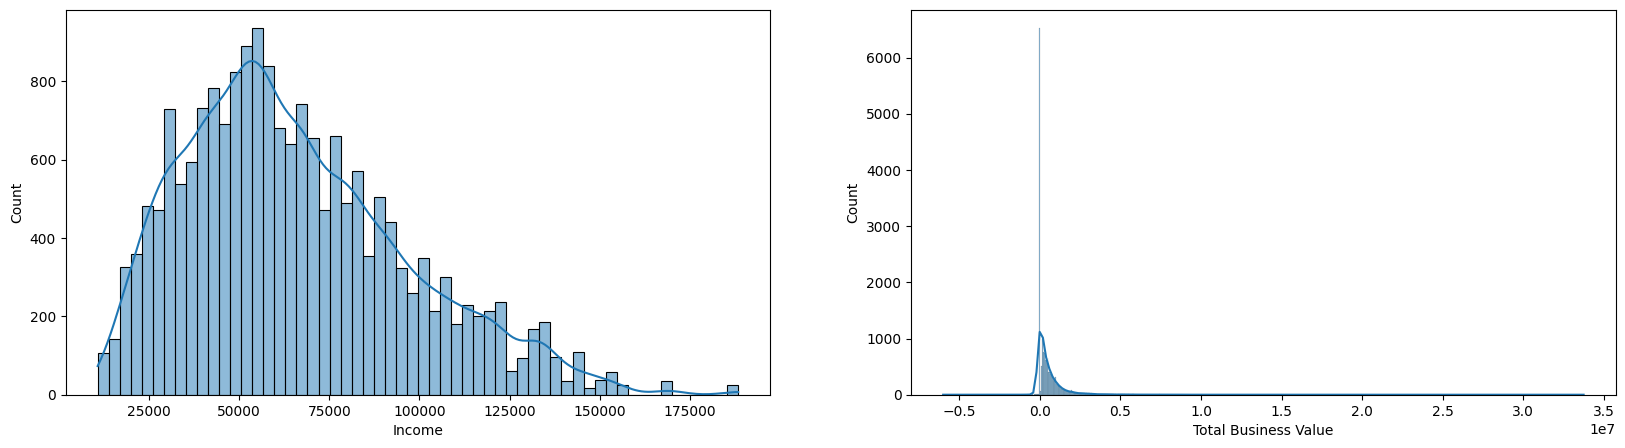

In [ ]:
#Plotting the histogram for continous variables
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.histplot(data=df, x="Income", kde=True, ax=ax[0])
sns.histplot(data=df, x="Total Business Value", kde=True, ax=ax[1])
plt.show()

<B>Income</B> - The income of ola chauffer's follows a right skewed nature where the majority of the ola driver's are earning more than the average income.

<B>Total business value</B> - The business value can go up (positive trend) as well as down (negative trend). However, the average business value revolves around 0 which indicates neither positive nor negative.

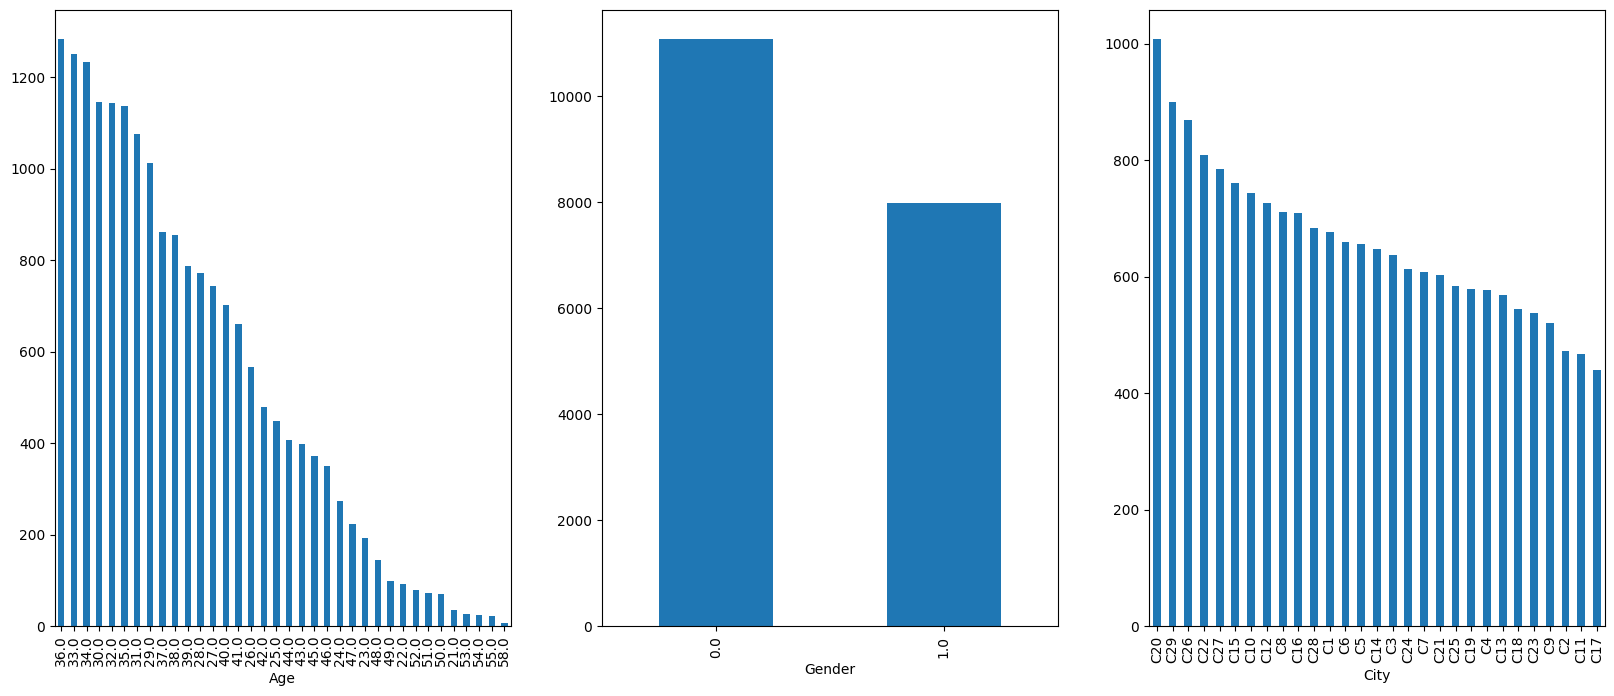

In [ ]:
#Countplot for Age, Gender and City
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
df['Age'].value_counts().plot(kind='bar',ax=ax[0])
df['Gender'].value_counts().plot(kind='bar',ax=ax[1])
df['City'].value_counts().plot(kind='bar',ax=ax[2])
plt.show()

<B>Age</B> - The most frequent age category in the ola dataset is 36 followed by 33 and 34. While the least frequent age category 54, 55 and 58.

<B>Gender</B> - The most frequent gender in ola dataset is males compared to females.

<B>City</B> - The most frequent city category in the ola dataset is C20 followed by C29 and C26. While the least frequent city category C2, C11 and C17.

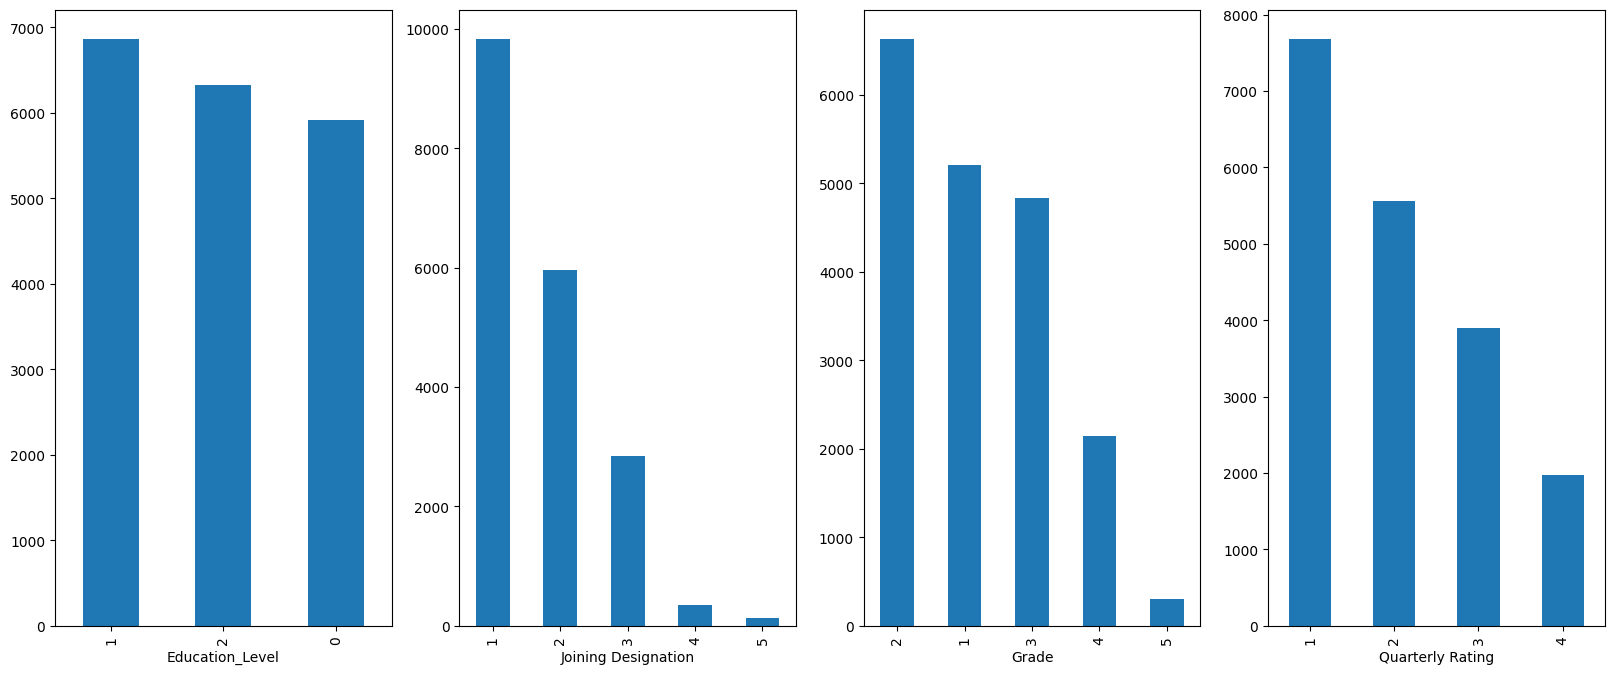

In [ ]:
#Countplot for Education_Level, Joining Designation, Grade and Quarterly Rating
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,8))
df['Education_Level'].value_counts().plot(kind='bar',ax=ax[0])
df['Joining Designation'].value_counts().plot(kind='bar',ax=ax[1])
df['Grade'].value_counts().plot(kind='bar',ax=ax[2])
df['Quarterly Rating'].value_counts().plot(kind='bar',ax=ax[3])
plt.show()

<B>Education_Level</B> - The most frequent education level is 1 in the ola dataset followed by 2 and 0.

<B>Joining Designation</B> - The most common joining designation is category 1 followed by 2, 3, 4 and 5.

<B>Grade</B> - The most common grade in the ola dataset is 2 followed by 1, 3, 4 and 5.

<B>Quarterly Rating</B> - The most frequent quarterly rating is 1 in the ola dataset followed by 2, 3 and 4.

### Bi-variate Analysis

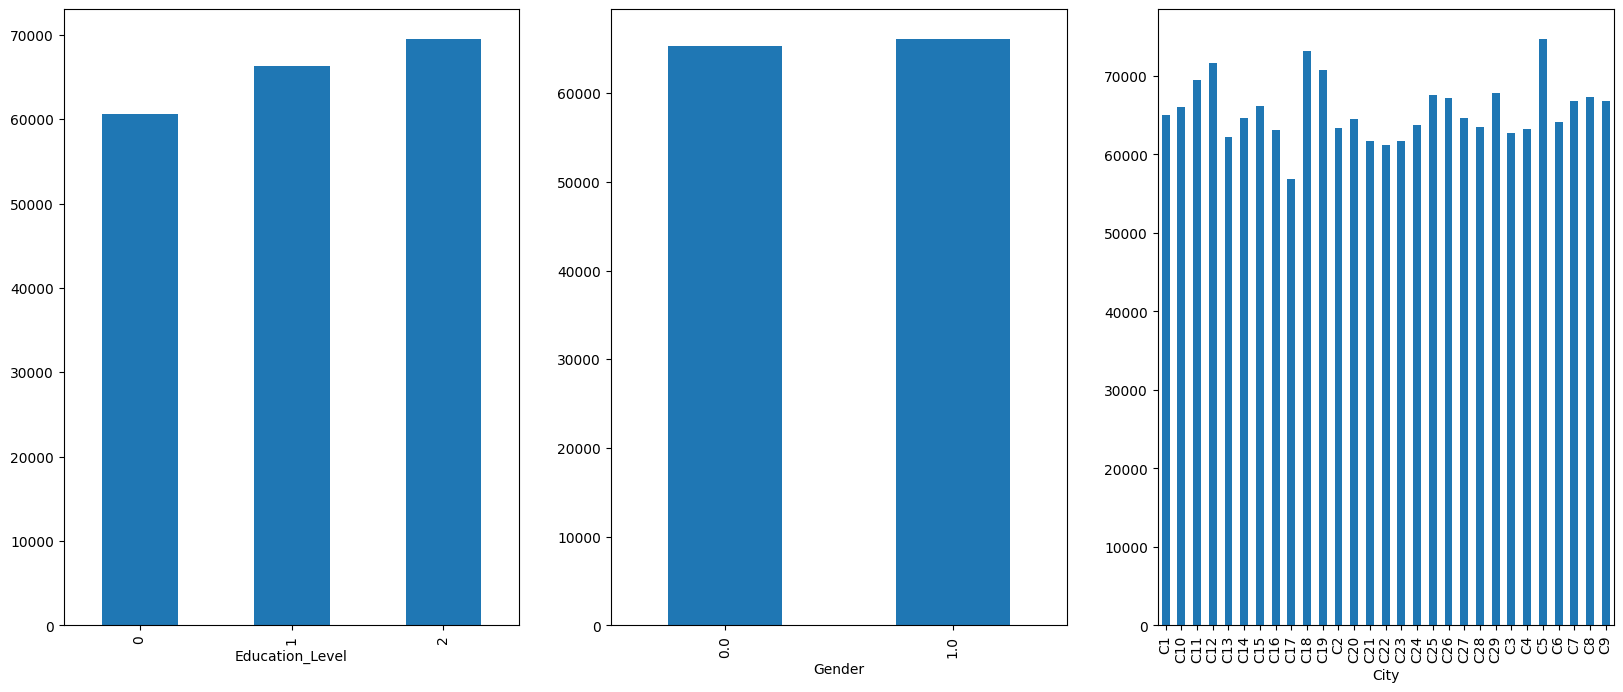

In [ ]:
#Average Income by Education_Level, Gender, or City.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
df.groupby('Education_Level')['Income'].mean().plot(kind='bar',ax=ax[0])
df.groupby('Gender')['Income'].mean().plot(kind='bar',ax=ax[1])
df.groupby('City', observed=False)['Income'].mean().plot(kind='bar',ax=ax[2])
plt.show()

The first figure clearly indicates that graduates (Education category 2) earn a higher average income compared to other education levels. The second figure reveals that females have a higher average income than males. Lastly, city C5 boasts the highest average income among Ola drivers, while city C17 has the lowest.

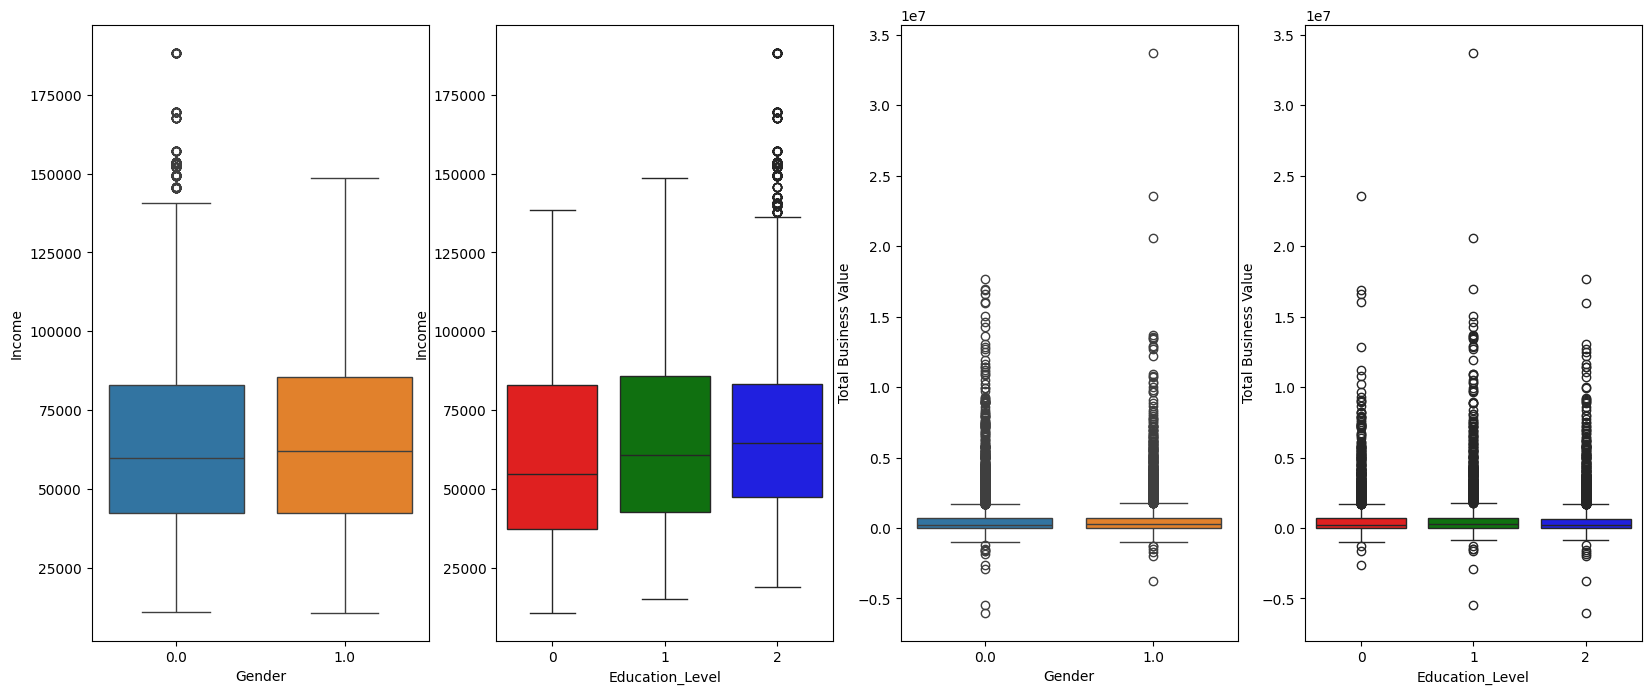

In [ ]:
#Income distribution based on gender and education levels followed by Total business value distribution based on gender and education levels
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,8))
sns.boxplot(data=df, x='Gender', y='Income', hue='Gender', legend=False, ax=ax[0])
sns.boxplot(data=df, x='Education_Level', y='Income', hue='Education_Level', palette = ['red','green','blue'], legend=False, ax=ax[1])
sns.boxplot(data=df, x='Gender', y='Total Business Value', hue='Gender', legend=False, ax=ax[2])
sns.boxplot(data=df, x='Education_Level', y='Total Business Value', hue='Education_Level', palette = ['red','green','blue'], legend=False, ax=ax[3])
plt.show()

The income distribution by gender shows that females have a slightly higher median income compared to males. Additionally, there are outliers in the male category, suggesting that a few males earn significantly higher incomes compared to other males and all females. Similarly, the income distribution by education level reveals that education category 2 has higher income levels compared to categories 1 and 0.

Total business value refers to the revenue a driver generates in a specific month. Positive business values represent income sources such as fares collected from customers and incentives provided by Ola, while negative business values result from factors like ride cancellations or car EMI adjustments. The third figure shows that females have a higher median total business value compared to males. Interestingly, males are more likely to have negative business values than females. The last figure highlights that education category 2 has a slightly higher median total business value than the other categories. However, a negative trend in total business value is evident across all three education categories, with education category 2 experiencing the highest negative business values.

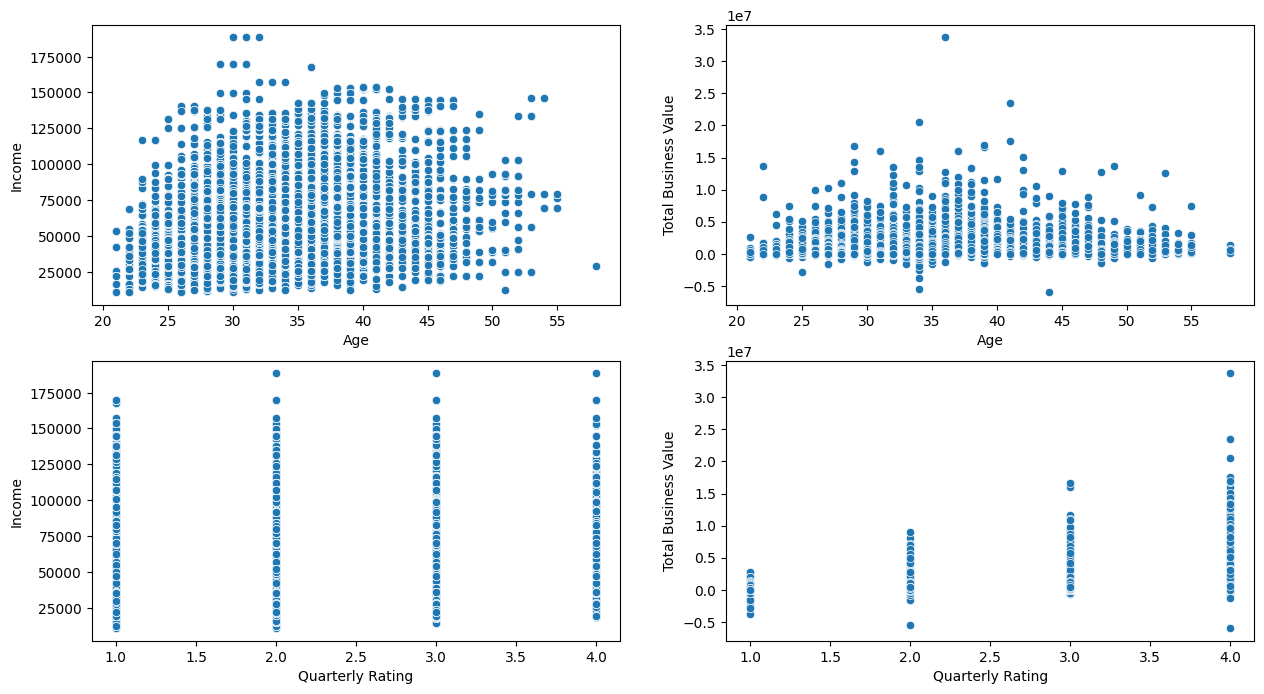

In [ ]:
#Scatter plot for age vs income and total business values followed by quarterly ratings vs income and total business values
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
sns.scatterplot(data=df, x='Age', y='Income', ax=ax[0,0])
sns.scatterplot(data=df, x='Age', y='Total Business Value', ax=ax[0,1])
sns.scatterplot(data=df, x='Quarterly Rating', y='Income', ax=ax[1,0])
sns.scatterplot(data=df, x='Quarterly Rating', y='Total Business Value', ax=ax[1,1])
plt.show()

**Age vs. Income:** Drivers aged 30-35 earn significantly higher incomes, while only a few aged 20-23 earn less than 100,000. Additionally, very few drivers above 50 earn less than 150,000.  

**Age vs. Total Business Values:** Total business values show an upward trend for ages 20-28, 34-37, and 41-46, but a downward trend for ages 28-34, 37-41, and 46-55.  

**Quarterly Rating vs. Income:** Income ranges from 15,000 to 185,000 across all quarterly rating categories, indicating no impact of ratings on income.  

**Quarterly Rating vs. Total Business Values:** Poor quarterly ratings correspond to lower business values, while higher ratings lead to better business values, showing a strong impact of ratings on performance.  

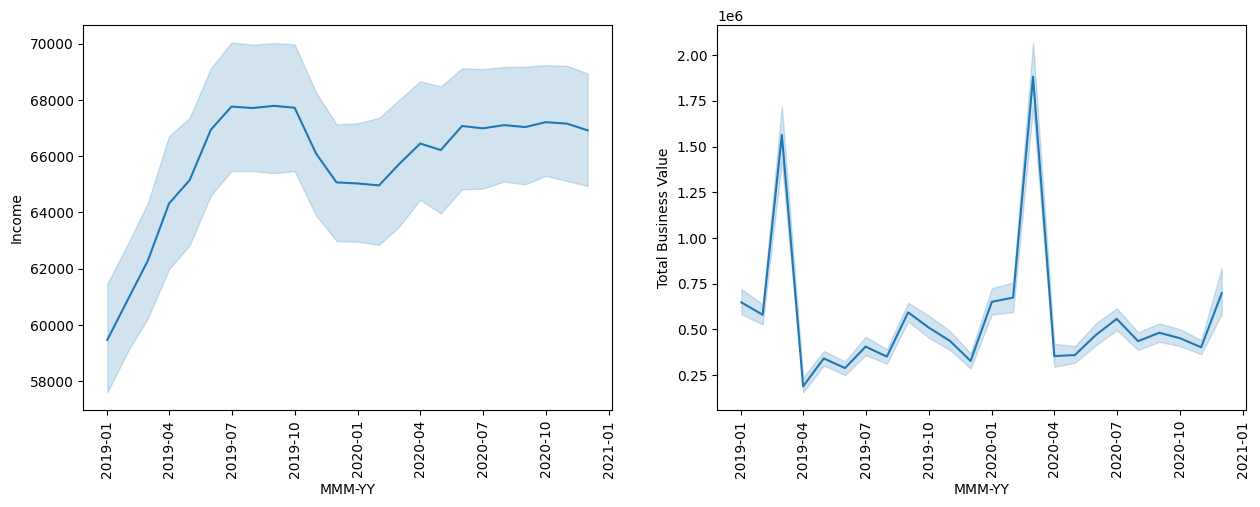

In [ ]:
#Income and total business values based on the reporting month
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%m/%d/%y')
df = df.sort_values(by='MMM-YY')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.lineplot(data=df, x='MMM-YY', y='Income', ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)
sns.lineplot(data=df, x='MMM-YY', y='Total Business Value', ax=ax[1])
plt.sca(ax[1])
plt.xticks(rotation=90)
plt.show()

**Reporting Date vs. Income:** Income steadily rises from around 59,000 in January 2019 to July 2019, remains stable until October 2019, declines until January 2020, and then stabilizes before gradually increasing again.  

**Reporting Date vs. Total Business Values:** Total business values fluctuate between 2019 and 2020, with a noticeable spike in the first quarter of each year.

### Multi-variate Analysis

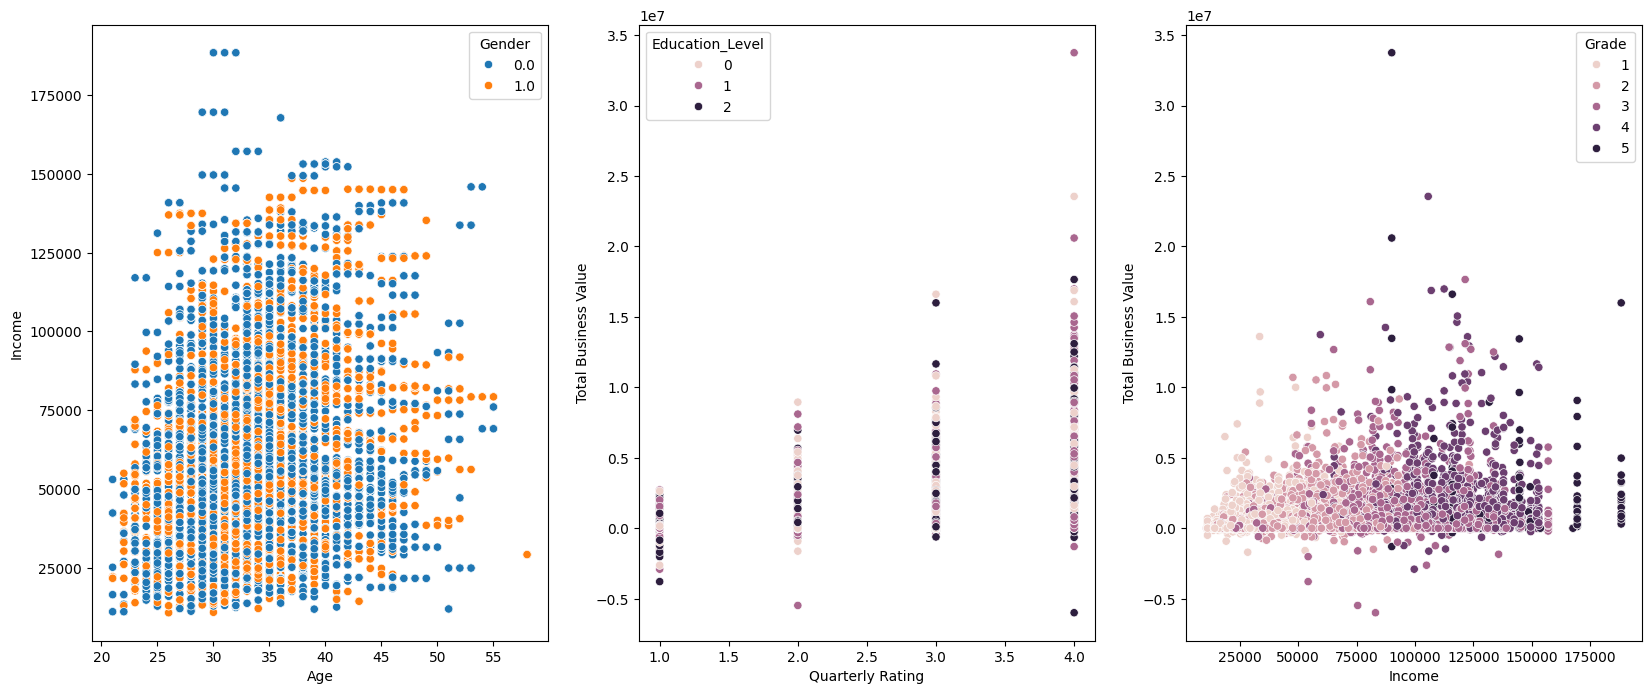

In [ ]:
#Scatterplot Age vs Income categorised by gender
#Scatterplot Quarterly Rating vs Total business value categorised by education level
#Scatterplot Income vs Total business value categorised by Grade
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender', ax=ax[0])
sns.scatterplot(data=df, x='Quarterly Rating', y='Total Business Value', hue='Education_Level', ax=ax[1])
sns.scatterplot(data=df, x='Income', y='Total Business Value', hue='Grade', ax=ax[2])
plt.show()

**Age vs Income by gender** - We can say that between the age of 23 and 50 there's a fair distribution of males and females whose income is below 150000. Notably, males between the age of 25 and 40 earns more than 150000.

**Quarterly Rating vs Total business value by education level** - As quarterly rating increases total busines value also increases and if we pay attention to the quarterly rating 4 we can see that a fair combination of education level 1 and 2.

**Income vs Total business value by Grade** - Driver's who are earning a salary between 100,000 - 125,000 have positively impacted the total business value and they belong to either 3 or 4 grade category. Drivers with higher income which is greater than 150,000 has a grade category of 5 and positively impacted the total business value.

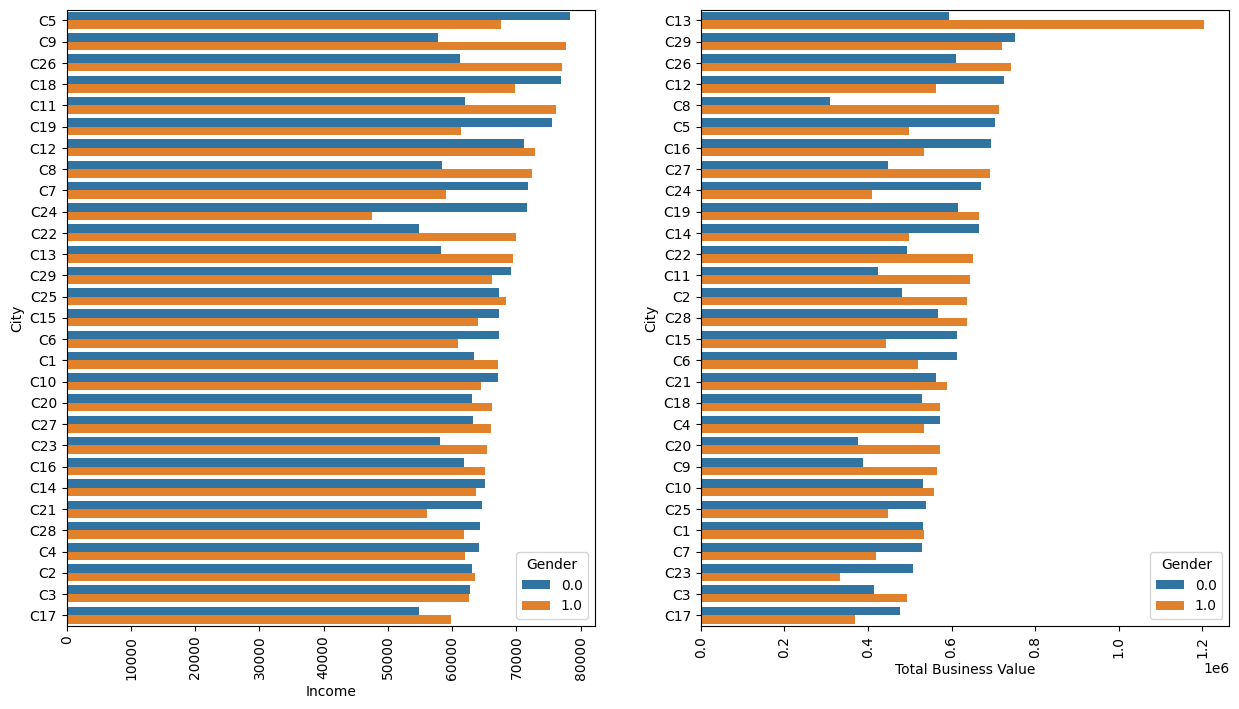

In [ ]:
#Average income in each city for each gender category
avgIncome_by_city = df.groupby(['City', 'Gender'],observed=True)['Income'].mean().reset_index()
avgIncome_by_city = avgIncome_by_city.sort_values(by='Income', ascending=False)
#Average total business value in each city for each gender category
avgTot_busVal_by_educationLevel = df.groupby(['City', 'Gender'],observed=True)['Total Business Value'].mean().reset_index()
avgTot_busVal_by_educationLevel = avgTot_busVal_by_educationLevel.sort_values(by='Total Business Value', ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.barplot(data=avgIncome_by_city, x='Income', y='City', hue='Gender', orient="h", order=avgIncome_by_city['City'], ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)
sns.barplot(data=avgTot_busVal_by_educationLevel, x='Total Business Value', y='City', hue='Gender', orient="h", order=avgTot_busVal_by_educationLevel['City'], ax=ax[1])
plt.sca(ax[1])
plt.xticks(rotation=90)
plt.show()

**Average Income by City and Gender** - City C5 has the highest average income for males, while city C9 leads for females among all city categories.

**Average Total Business Value by City and Gender** - City C13 records the highest average total business value for females, while city C29 tops the list for males.

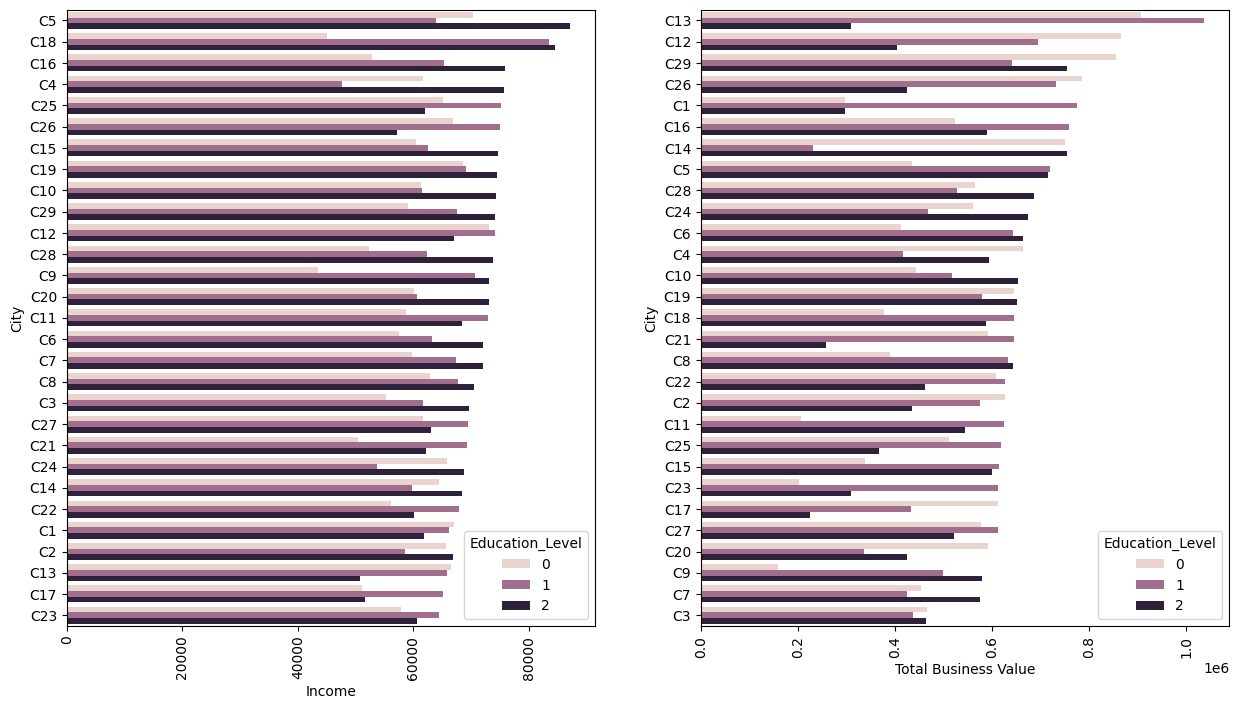

In [ ]:
#Average income in each city for each education category
avgIncome_by_city = df.groupby(['City', 'Education_Level'],observed=True)['Income'].mean().reset_index()
avgIncome_by_city = avgIncome_by_city.sort_values(by='Income', ascending=False)
#Average total business value in each city for each education category
avgTot_busVal_by_educationLevel = df.groupby(['City', 'Education_Level'],observed=True)['Total Business Value'].mean().reset_index()
avgTot_busVal_by_educationLevel = avgTot_busVal_by_educationLevel.sort_values(by='Total Business Value', ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.barplot(data=avgIncome_by_city, x='Income', y='City', hue='Education_Level', orient="h", order=avgIncome_by_city['City'], ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)
sns.barplot(data=avgTot_busVal_by_educationLevel, x='Total Business Value', y='City', hue='Education_Level', orient="h", order=avgTot_busVal_by_educationLevel['City'], ax=ax[1])
plt.sca(ax[1])
plt.xticks(rotation=90)
plt.show()

**Average Income by City and Education Category** - City C5 has the highest average income for education category 2, while city C18 leads for education category 1 and finally city C29 tops the list for education category 0.

**Average Total Business Value by City and Education Category** - City C13 records the highest average total business value for education category 1, while city C12 tops the list for education category 0. Finally, the city C14 has highest avg. total business value for education category 2.

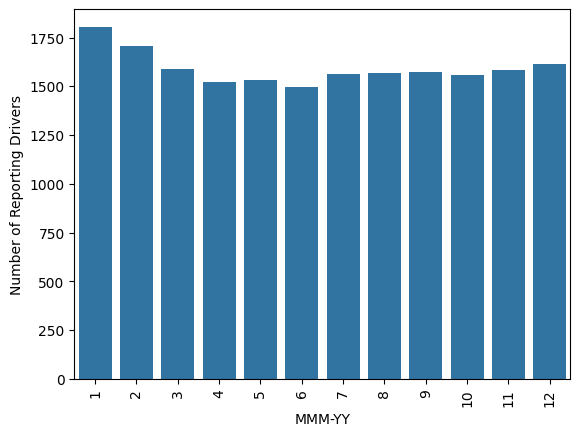

In [ ]:
# number of driver's reporting in each month
Reporting_Drivers_Count = df.groupby(df['MMM-YY'].dt.month)['Driver_ID'].count().reset_index()
Reporting_Drivers_Count = Reporting_Drivers_Count.sort_values(by='Driver_ID', ascending=False)
sns.barplot(data=Reporting_Drivers_Count, x='MMM-YY', y='Driver_ID')
plt.ylabel('Number of Reporting Drivers')
plt.xticks(rotation=90)
plt.show()

The number of drivers reporting in the month of January is comparitively higher than other months. The graph also illustrates that the July is the least reporting month.

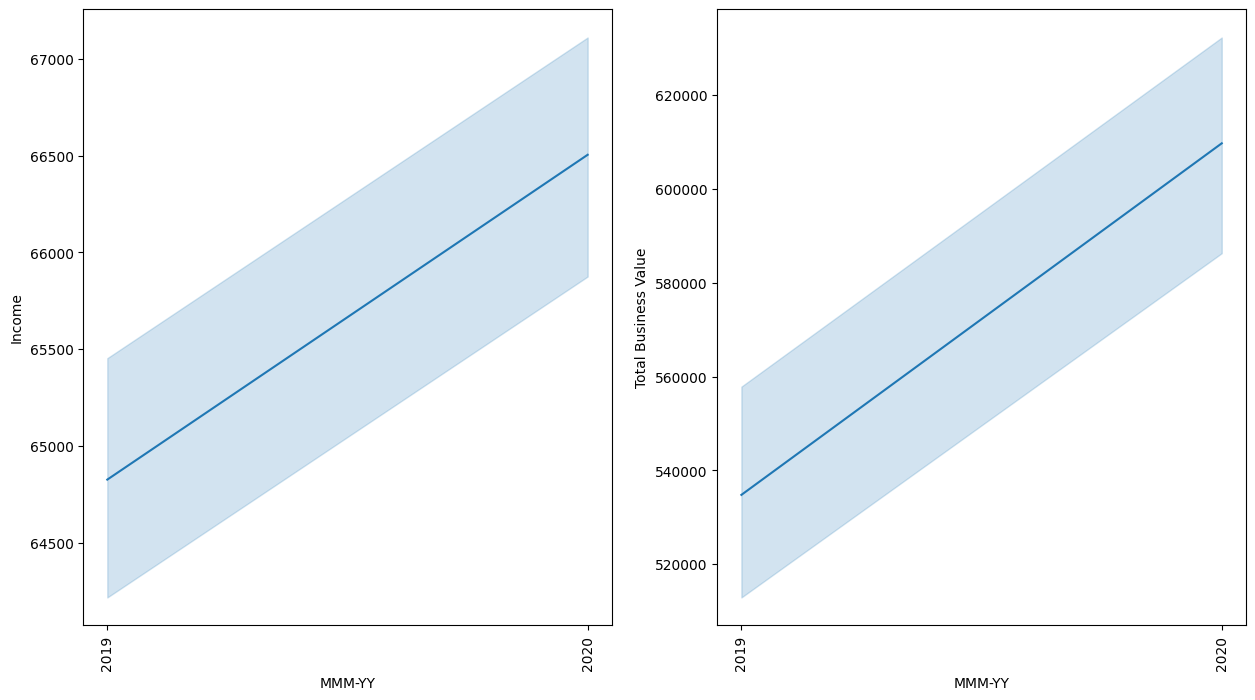

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
#Trend of income based on annual reporting
sns.lineplot(x=(df['MMM-YY'].dt.year).astype(str), y=df['Income'], ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)
#Trend of total business values based on annual reporting
sns.lineplot(x=(df['MMM-YY'].dt.year).astype(str), y=df['Total Business Value'], ax=ax[1])
plt.sca(ax[1])
plt.xticks(rotation=90)
plt.show()

Both income and total business value shows a considerable progression between 2019 to 2020.

In [ ]:
# Year and Month of joining
df['Month of Joining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y').dt.month
df['Year of Joining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y').dt.year

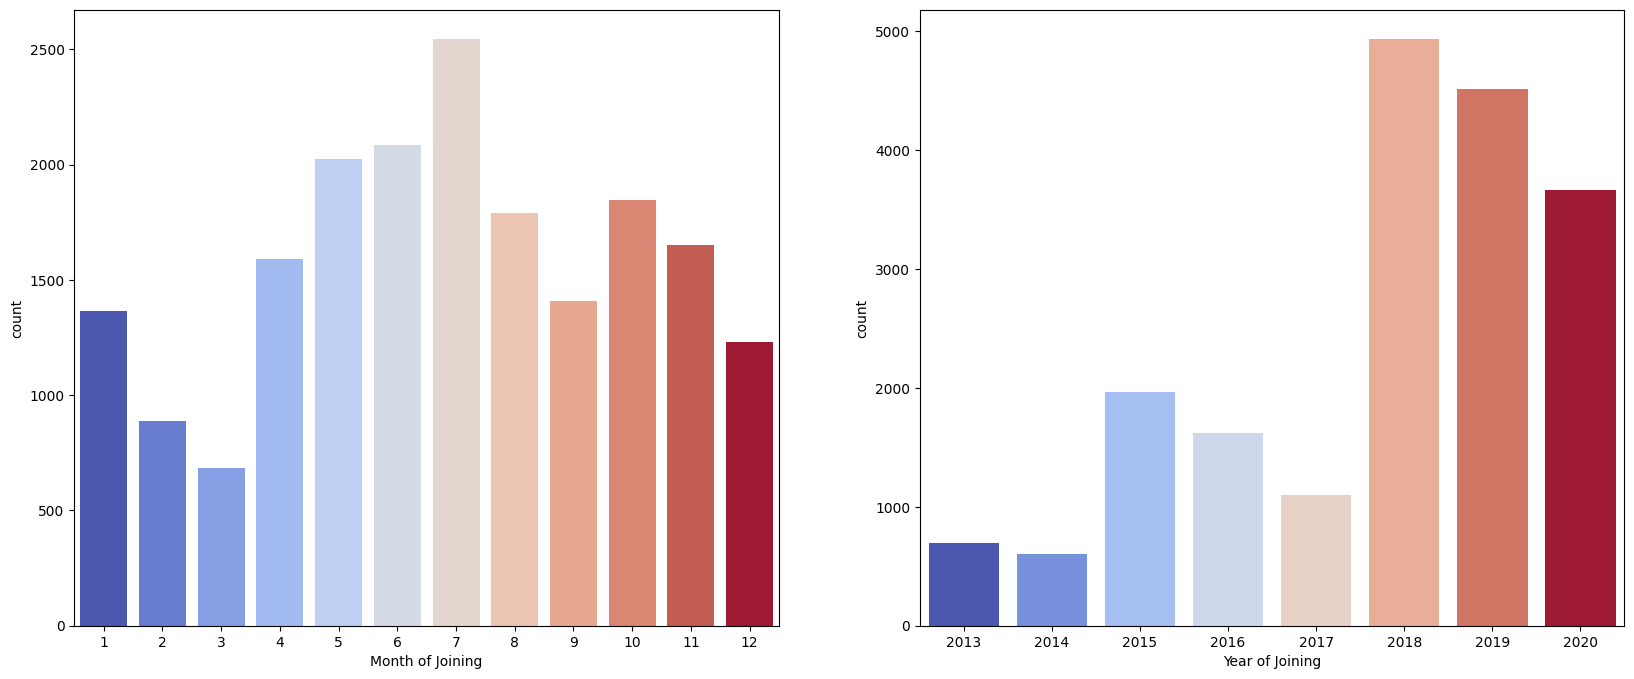

In [ ]:
#Number of drivers joined the ola based on year and month
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(x='Month of Joining', hue='Month of Joining', data=df, legend=False, palette='coolwarm', ax=ax[0])
sns.countplot(x='Year of Joining', hue='Year of Joining', data=df, legend=False, palette='coolwarm', ax=ax[1])
plt.show()

<B>Month of Joining</B> - The graph reveals a peak in driver recruitment during July, indicating it as the most active month for new hires. In contrast, March shows the lowest recruitment numbers, suggesting minimal driver onboarding during that period.

<B>Year of Joining</B> - The graph shows that the majority of drivers joined Ola during 2018, 2019, and 2020, while the fewest joined in 2014.

In [ ]:
# Year and Month of driver's leaving the company
df['Month of Leaving'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y').dt.month
df['Year of Leaving'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y').dt.year

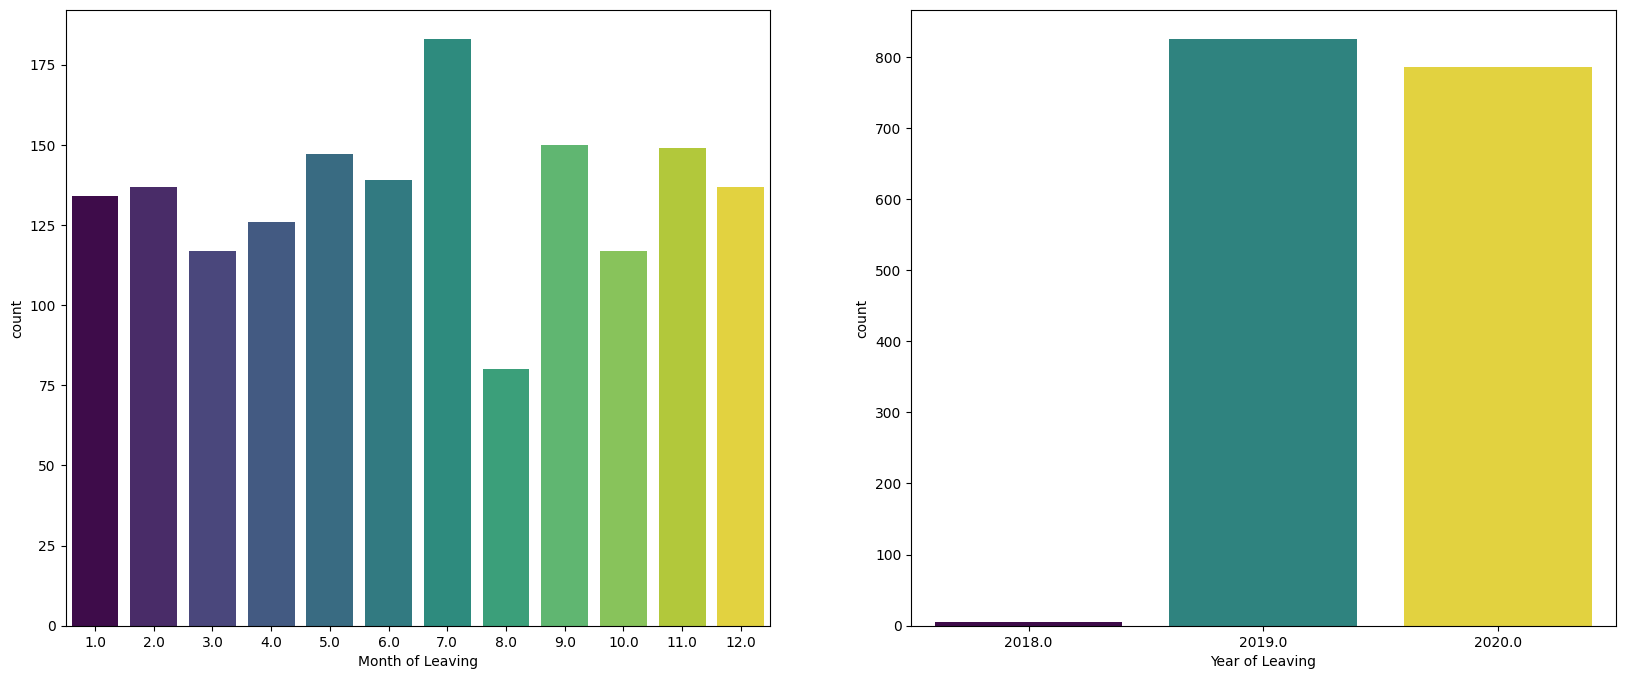

In [ ]:
#Number of drivers left the ola based on year and month
fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(20,8))
sns.countplot(x='Month of Leaving', hue='Month of Leaving', data=df, legend=False, palette='viridis', ax=ax[0])
sns.countplot(x='Year of Leaving', hue='Year of Leaving', data=df, legend=False, palette='viridis', ax=ax[1])
plt.show()

<B>Month of Leaving</B> - The graph reveals a peak in drivers left the company during July, indicating it as the highest churn rate. In contrast, August shows the lowest churn rate, suggesting minimal driver leaving the company during that period.

<B>Year of Leaving</B> - The graph shows that the majority of drivers leave Ola during 2019 and 2020. One possible reason could be Covid-19 which has impacted all the companies worldwide.

In [ ]:
from datetime import datetime

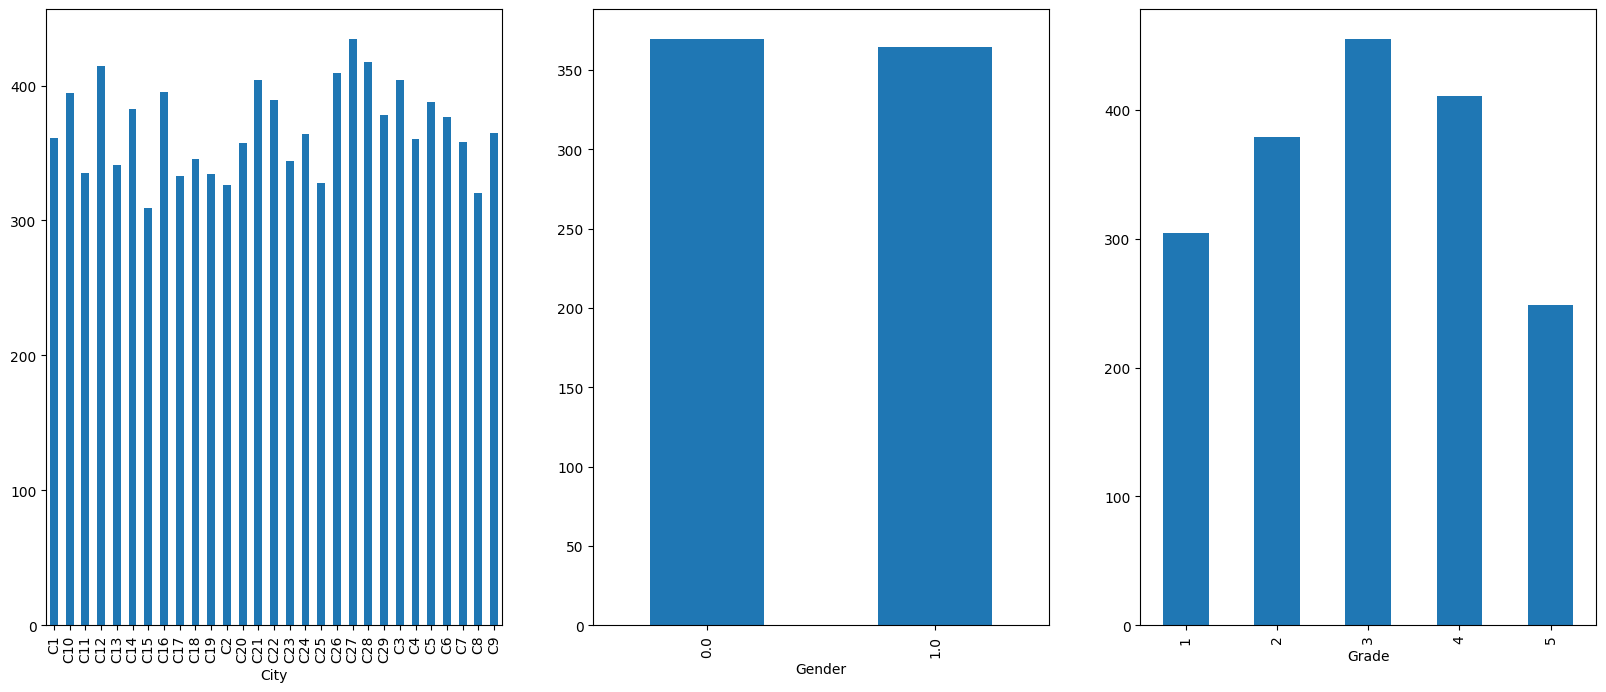

In [ ]:
#Calculation of duration which is defined as the difference between Dateofjoining and Lastworkingdate
df['duration'] = df['LastWorkingDate'].apply(lambda x: datetime.strptime(x, '%d/%m/%y') - datetime.strptime(df['Dateofjoining'][0], '%d/%m/%y'))
df['duration'] = df['duration'].apply(lambda x: x.days)
df['duration'] = df['duration'].astype('float64')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
#Average duration based on City, Gender and Grade
df.groupby('City',observed=False)['duration'].mean().plot(kind='bar',ax=ax[0])
df.groupby('Gender')['duration'].mean().plot(kind='bar',ax=ax[1])
df.groupby('Grade')['duration'].mean().plot(kind='bar',ax=ax[2])
plt.show()

**Avg. Duration based on City** - Avg. duration (people stayed ola and left) is extremely high for the drivers belongs to City C27 and it is approximately around 500. While, the avg. duration is extremely low for people who belongs to the city C15.

**Avg. Duration based on Gender** - Avg. duration is slightly higher for males compared to females

**Avg. Duration based on Grade** - Avg. duration is high for grade 3 followed by 4 and then grade 2.

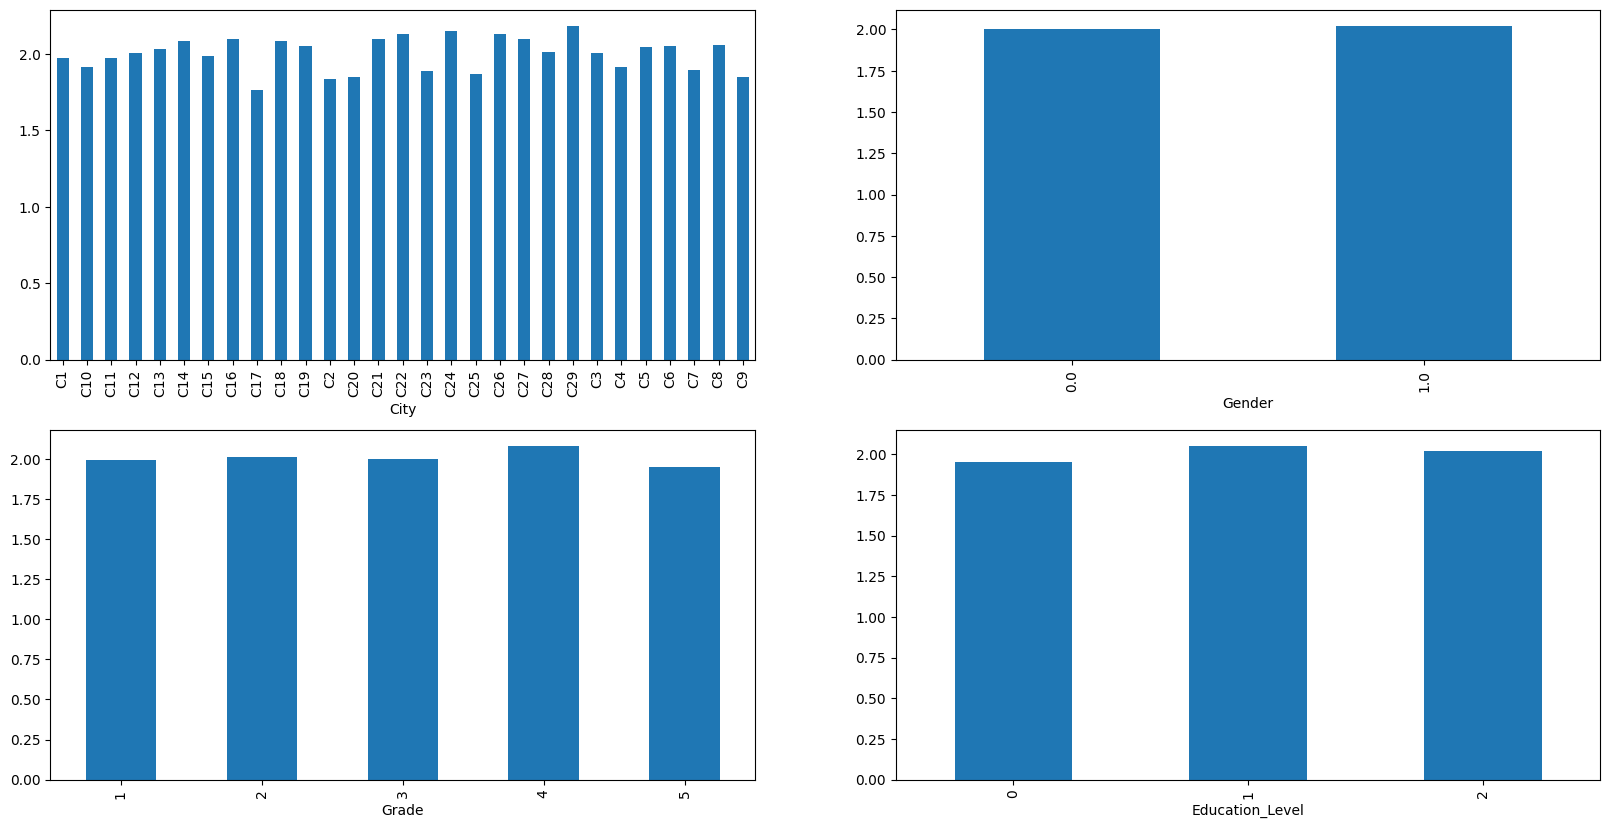

In [ ]:
#Avg. rating based on City, Gender, Grade and Education_level
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
df.groupby('City',observed=False)['Quarterly Rating'].mean().plot(kind='bar',ax=ax[0,0])
df.groupby('Gender')['Quarterly Rating'].mean().plot(kind='bar',ax=ax[0,1])
df.groupby('Grade')['Quarterly Rating'].mean().plot(kind='bar',ax=ax[1,0])
df.groupby('Education_Level')['Quarterly Rating'].mean().plot(kind='bar',ax=ax[1,1])
plt.show()

Average quartely rating is approximately 2 irrespective of city, gender, grade and education level.

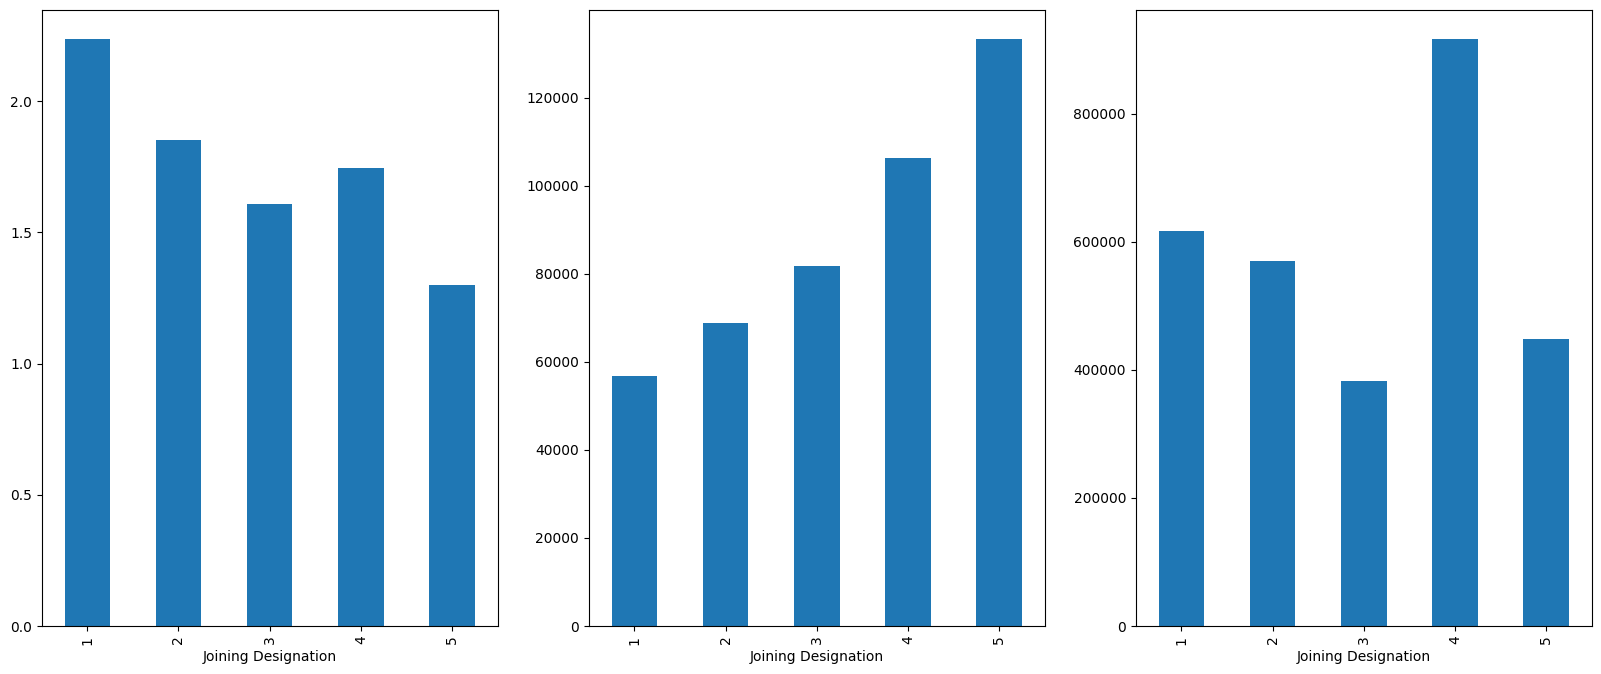

In [ ]:
#Avg. quarterly rating, Income, total business value based on Joining Designation
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
df.groupby('Joining Designation',observed=False)['Quarterly Rating'].mean().plot(kind='bar',ax=ax[0])
df.groupby('Joining Designation')['Income'].mean().plot(kind='bar',ax=ax[1])
df.groupby('Joining Designation')['Total Business Value'].mean().plot(kind='bar',ax=ax[2])
plt.show()

**Joining Designation vs Quarterly Ratings** - People with joining designation 1 has an average quarterly rating of 2, followed by joining designation 1 recieves an avg. quarterly rating of 1.75 and then joining designation 4 recieves an avg. quarterly rating of 1.65.

**Joining Designation vs Income** - The average income increases based on the joining designation showing that the joining designation with least value recives lower income while joining designation with highest value recieves higher income.

**Joining Designation vs Total business value** - The avg. total business value has been heavily impacted for the joining designation 4 while it is leastly impacted by joining designation 3.


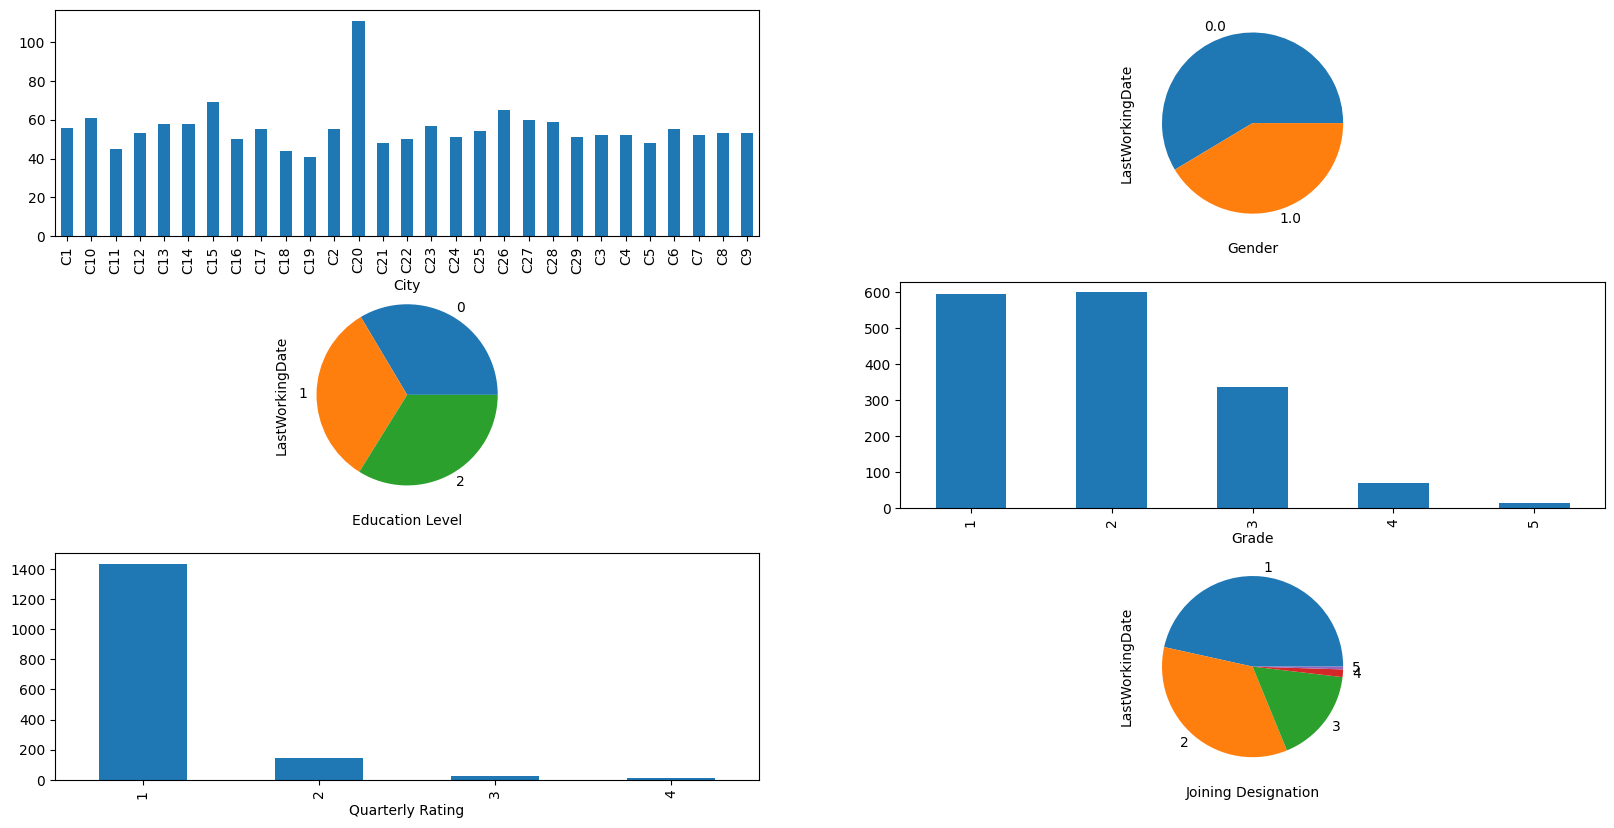

In [ ]:
#People who left ola based on City, Gender, Education_level, Grade, Quarterly rating and joining designation
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
df.groupby('City',observed=False)['LastWorkingDate'].count().plot(kind='bar', ax = ax[0,0])
df.groupby('Gender')['LastWorkingDate'].count().plot(kind='pie', ax = ax[0,1])
plt.sca(ax[0,1])
plt.xlabel('Gender')
df.groupby('Education_Level')['LastWorkingDate'].count().plot(kind='pie', ax = ax[1,0])
plt.sca(ax[1,0])
plt.xlabel('Education Level')
df.groupby('Grade')['LastWorkingDate'].count().plot(kind='bar', ax = ax[1,1])
df.groupby('Quarterly Rating')['LastWorkingDate'].count().plot(kind='bar', ax = ax[2,0])
df.groupby('Joining Designation')['LastWorkingDate'].count().plot(kind='pie', ax = ax[2,1])
plt.sca(ax[2,1])
plt.xlabel('Joining Designation')
plt.show()

**City** - Driver's in the city C20 has highest churn rate.

**Gender** - Male driver's have the tendency to leave the company compared to females.

**Education_Level** - It seems like people who left the ola has equal proportion on the education category.

**Grade** - People with grades 1 and 2 has highest churn rate.

**Quarterly Ratings** - People with querterly rating 1 has highest churn rate.

**Joining Designation** - People with the joining designation 1, 2 and 3 have high tendency to leave the company.

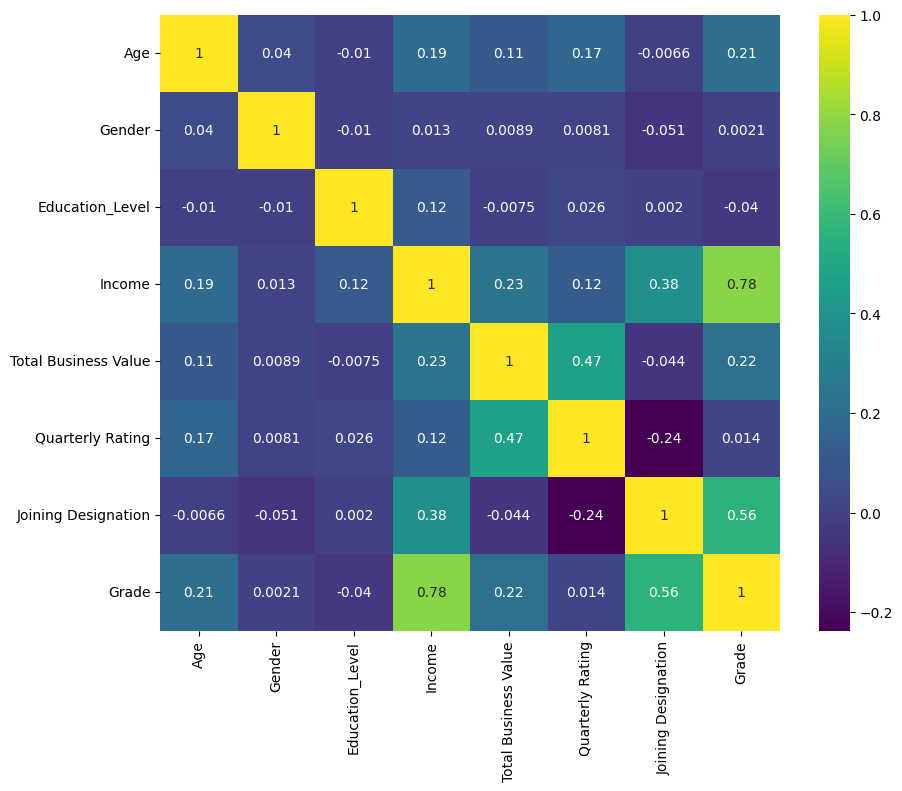

In [ ]:
#Correlation between independent variables
plt.figure(figsize=(10,8))
cols = ['Age','Gender','Education_Level','Income','Total Business Value','Quarterly Rating','Joining Designation','Grade']
corelation_matrix = df[cols].corr()
sns.heatmap(corelation_matrix, annot=True, cmap='viridis')
plt.show()

We can see that there's a correlation between each independent variables but there's no strong correlation between any of them.

## Data Preprocessing

In [ ]:
#Total number of duplicates in the Ola dataset
df.duplicated().sum()

0

The dataset does not suffer from duplicate values.

### A. Feature Engineering

In [ ]:
# Sort the data by Driver_ID and Reporting Date
df = df.sort_values(by=['Driver_ID', 'MMM-YY'])

# Calculate the difference in Quarterly Rating
df['rating_diff'] = df.groupby('Driver_ID')['Quarterly Rating'].diff()

# Create a new column indicating if the rating increased
df['rating_increased'] = (df['rating_diff'] > 0).astype(int)

# Drop the intermediate column if not needed
df.drop(columns=['rating_diff'], inplace=True)

#Checking whether quarterly rating has increased or not
df['rating_increased'].value_counts()

,count
rating_increased,
0,16311
1,2793


We can say that rating has improved or increased for 1245 driver's in the Ola dataset.

In [ ]:
# Create the 'target' column
df['target'] = df['LastWorkingDate'].notnull().astype(int)
df['target'].value_counts()

,count
target,
0,17488
1,1616


We can say that 1616 drivers has left the ola company.

In [ ]:
# Sort the data by Driver_ID and Reporting Date
df = df.sort_values(by=['Driver_ID', 'MMM-YY'])

# Calculate the income difference and create the column
df['income_increased'] = df.groupby('Driver_ID')['Income'].diff().gt(0).astype(int)

df['income_increased'].value_counts()

,count
income_increased,
0,18934
1,170


It is observed that the income has increased for 44 drivers in the given ola dataset.

In [ ]:
#Statistical summary of the new dataset
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Month of Joining,Year of Joining,Month of Leaving,Year of Leaving,duration,rating_increased,target,income_increased
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000,19104.000000,1616.000000,1616.000000,1616.000000,19104.000000,19104.000000,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,6.823178,2017.776330,6.532178,2019.483292,367.974010,0.146200,0.084590,0.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,3.131894,1.920872,3.445312,0.506031,219.052232,0.353316,0.278277,0.093915
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,1.000000,2013.000000,1.000000,2018.000000,7.000000,0.000000,0.000000,0.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,5.000000,2016.000000,4.000000,2019.000000,168.000000,0.000000,0.000000,0.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,7.000000,2018.000000,7.000000,2019.000000,361.500000,0.000000,0.000000,0.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,9.000000,2019.000000,9.000000,2020.000000,568.000000,0.000000,0.000000,0.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,12.000000,2020.000000,12.000000,2020.000000,735.000000,1.000000,1.000000,1.000000


**duration** - the minimum duration is 7 days before leaving the company and the maximum duration is 735 days before leaving the comapny. We can say that a driver stays atleast 1 year before leaving the company.

**rating_increased, target, and income_increased** - has only 2 values 1 and 0.

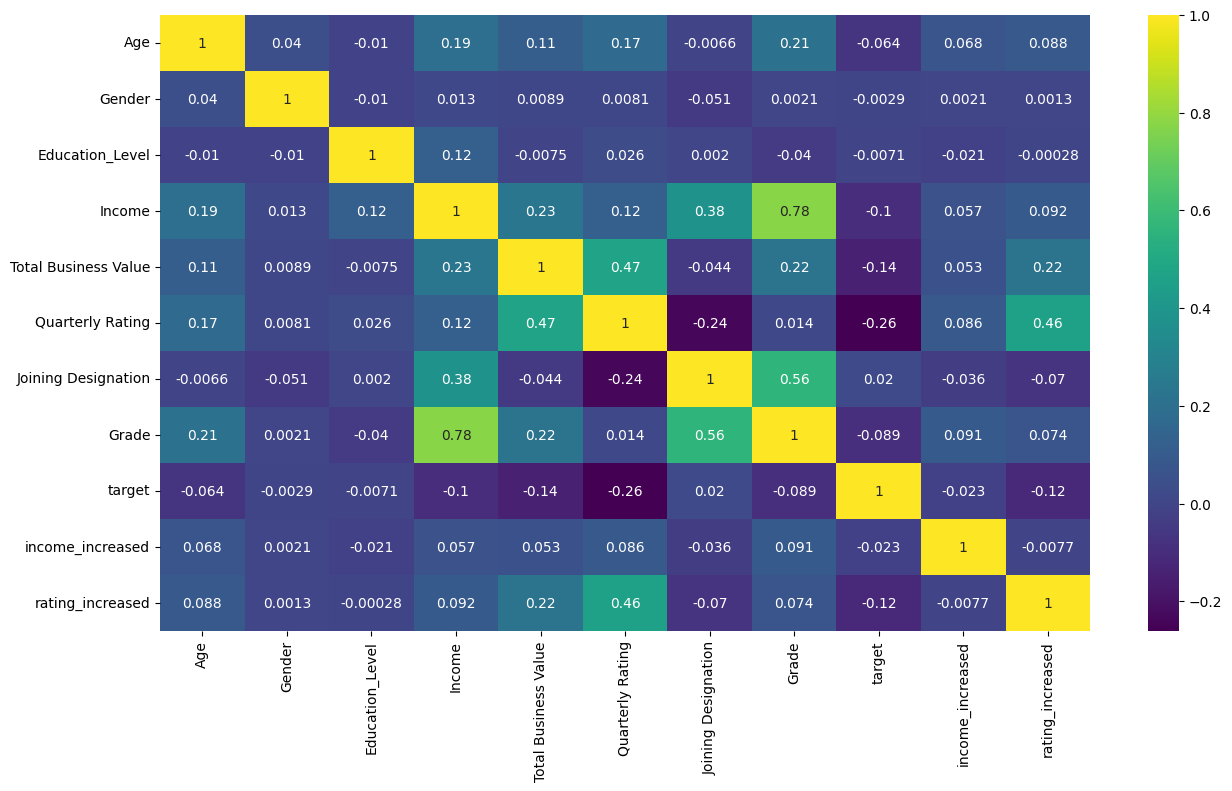

In [ ]:
#Correlation between independent variables of the derived dataset
plt.figure(figsize=(15,8))
cols = ['Age','Gender','Education_Level','Income','Total Business Value','Quarterly Rating','Joining Designation','Grade','target','income_increased','rating_increased']
corelation_matrix = df[cols].corr()
sns.heatmap(corelation_matrix, annot=True, cmap='viridis')
plt.show()

We can see that there's a correlation between each independent variables but there's no strong correlation between any of them.

### B. KNN Imputation

In [ ]:
#Imputing necessary libraries for scaling and imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
#Importing target encoders for the category city

encoder = TargetEncoder(cols=['City'], smoothing=5)
df['City_Target_Encoded'] = encoder.fit_transform(df['City'], df['target'])

In [ ]:
#Identifying gender based on target column and crosstab calculation
df['Gender'] = df['Gender'].fillna(2)
cross_table = pd.crosstab(df['Gender'], df['target'])
cross_table

target,0,1
Gender,,
0.0,10130,944
1.0,7311,667
2.0,47,5


In [ ]:
#Imputing the missing value with the most frequent value.
df['Gender'] = df['Gender'].replace(2.0, 0.0)
df['Gender'].value_counts()

,count
Gender,
0.0,11126
1.0,7978


In [ ]:
#Seperating target variable from other independent variables
X = df.copy()
y = X['target']
X = X.drop(['Driver_ID', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate', 'target', 'City', 'Month of Joining', 'Year of Joining', 'Month of Leaving', 'Year of Leaving'], axis=1)

In [ ]:
#KNN - imputation for missing values
knn_imputer = KNNImputer(n_neighbors=5)
X_imputed = knn_imputer.fit_transform(X)

In [ ]:
#Converting imputed variable into a dataframe
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
X_imputed.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,duration,rating_increased,income_increased,City_Target_Encoded
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,553.8,0.0,0.0,0.105948
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,396.8,0.0,0.0,0.105948
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,314.0,0.0,0.0,0.105948
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,315.6,0.0,0.0,0.085386
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,315.6,0.0,0.0,0.085386


In [ ]:
#Importing one hot encoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
#Performing one-hot encoder for the column named gender
Encoder = OneHotEncoder(sparse_output=False)
X_encoded = Encoder.fit_transform(X_imputed[['Gender']])
feature_names = Encoder.get_feature_names_out(['Gender'])
X_encoded = pd.DataFrame(X_encoded, columns=feature_names)
X_imputed = pd.concat([X_imputed, X_encoded], axis=1)
X_imputed = X_imputed.drop('Gender', axis=1)

In [ ]:
#Displaying the data after encoding
X_imputed.head()

,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,duration,rating_increased,income_increased,City_Target_Encoded,Gender_0.0,Gender_1.0
0,28.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,553.8,0.0,0.0,0.105948,1.0,0.0
1,28.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,396.8,0.0,0.0,0.105948,1.0,0.0
2,28.0,2.0,57387.0,1.0,1.0,0.0,2.0,314.0,0.0,0.0,0.105948,1.0,0.0
3,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,315.6,0.0,0.0,0.085386,1.0,0.0
4,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,315.6,0.0,0.0,0.085386,1.0,0.0


Currently encoding is performed only for the gender column to make sure that our ML model treats both gender's with equal priority Education_level, Joining Designation, Grade, and Quarterly rating are not encoded even though they are categorical because each category has different meaning and they should'nt treat equally.

In [ ]:
#Performing standard scaling for the ola dataset
scale = StandardScaler()
X_scaled = scale.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)
X_scaled.head()

,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,duration,rating_increased,income_increased,City_Target_Encoded,Gender_0.0,Gender_1.0
0,-1.065816,1.222688,-0.267358,-0.825051,-1.220348,1.603674,-0.008812,1.115119,-0.413804,-0.094755,1.407911,0.846793,-0.846793
1,-1.065816,1.222688,-0.267358,-0.825051,-1.220348,-1.096482,-0.008812,-0.261454,-0.413804,-0.094755,1.407911,0.846793,-0.846793
2,-1.065816,1.222688,-0.267358,-0.825051,-1.220348,-0.506666,-0.008812,-0.987443,-0.413804,-0.094755,1.407911,0.846793,-0.846793
3,-0.586007,1.222688,0.044122,0.369747,-0.246150,-0.506666,-0.999102,-0.973414,-0.413804,-0.094755,0.052489,0.846793,-0.846793
4,-0.586007,1.222688,0.044122,0.369747,-0.246150,-0.506666,-0.999102,-0.973414,-0.413804,-0.094755,0.052489,0.846793,-0.846793


In [ ]:
#Importing train test split
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15283, 13), (3821, 13), (15283,), (3821,))

In [ ]:
#Checking for class imbalance
y.value_counts()

,count
target,
0,17488
1,1616


The dataset suffers from class imbalance in which target 0 has occured 17488 times compared to class 1 which has occured only 1616 times.

In [ ]:
#Percentage of class imbalance
print("% of class 1 :", (1616/(17488+1616)))
print("% of class 0 :", (17488/(17488+1616)))

% of class 1 : 0.08458961474036851
% of class 0 : 0.9154103852596315


It says that 91% of the data belongs to class 0 and almost 8% of the data belongs to class 1.

In [ ]:
#importing SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

In [ ]:
#Performing SMOTE
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

<ipython-input-168-325456e82556>:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())


In [ ]:
#Size and shape of the data after oversampling using SMOTE
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (27990, 13)
After OverSampling, the shape of train_y: (27990,) 

After OverSampling, counts of label '1': 13995
After OverSampling, counts of label '0': 13995


## Bagging Algorithm

In [ ]:
# Importing necessary library files for performing Bagging and Boosting algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_validate

In [ ]:
clf_1 = RandomForestClassifier(random_state=18, max_depth=5, n_estimators=101) #Building the random forest classifier

In [ ]:
#Performing cross-validation over traning and testing set
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf_1, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 94.42 
 Validation: 94.29
K-Fold Accuracy Std: 
 Train: 0.22, 
 Validation: 0.93


K-Fold Accuracy Mean:

Train Accuracy: 94.42% & Validation Accuracy: 94.29%

This indicates that the model performs similarly on both the training and validation sets, suggesting that it generalizes well.

K-Fold Accuracy Standard Deviation (Std):

Train Std: 0.22 & Validation Std: 0.93

The standard deviation measures the variability of accuracy across different folds.

Low Train Std (0.22%): The model is consistently performing well across training folds.

Slightly Higher Validation Std (0.93%): There's a little variability in validation performance, but it's still quite stable.

In [ ]:
#Fitting the ML model on the actual data
start = datetime.now()
clf_1.fit(X_train, y_train)
end = datetime.now()
clf_1_time = end - start
clf_1_trainAccuracy = clf_1.score(X_train, y_train)
clf_1_testAccuracy = clf_1.score(X_test, y_test)

print("Train accuracy: {:.2f}".format(clf_1.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(clf_1.score(X_test, y_test)*100))
print("Time taken to train the model: ", clf_1_time)

Train accuracy: 94.48
Test accuracy: 94.27
Time taken to train the model:  0:00:02.275295


Train Accuracy: 94.48%

**The model correctly classifies 94.48% of the training data.**
This is consistent with the K-Fold cross-validation results (~94.42%), suggesting stable learning.
Test Accuracy: 94.27%

**The model achieves 94.27% accuracy on unseen test data.**
This is very close to the train accuracy, indicating that the model generalizes well and is not overfitting.

**Time Taken to Train: ~3 seconds** The training time is quite short, indicating that the model is computationally efficient.

In [ ]:
#Building confusion matrix
y_pred = clf_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3485    8]
 [ 211  117]]


True Negatives (TN) : The model correctly predicted 3485 instances as negative, and they were actually negative.

False Positives (FP) : The model incorrectly predicted 8 instances as positive, but they were actually negative.

False Negatives (FN) : The model incorrectly predicted 211 instances as negative, but they were actually positive. These are "missed detections" and can be costly in certain applications.

True Positives (TP) : The model correctly predicted 117 instances as positive, and they were actually positive.

In [ ]:
#Building classification report
clf_1_precision = precision_score(y_test, y_pred)
clf_1_recall = recall_score(y_test, y_pred)
clf_1_f1Score = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3493
           1       0.94      0.36      0.52       328

    accuracy                           0.94      3821
   macro avg       0.94      0.68      0.74      3821
weighted avg       0.94      0.94      0.93      3821



**Precision (How many predicted positives were actually positive?)**
Class 0: 94% of predicted negatives were correct.
Class 1: 94% of predicted positives were correct.
Precision is high for both classes, meaning the model is good at avoiding false positives.

**Recall (How many actual positives were correctly identified?)**
Class 0: 100% recall, meaning the model captures all actual negatives correctly.
Class 1: 36% recall, meaning 64% of actual positives were misclassified as negative (high false negatives).

**F1-Score (Balance between Precision & Recall)**
Class 0: 0.97 (very strong performance)
Class 1: 0.52 (low due to poor recall)
The low F1-score for Class 1 suggests that the model is struggling to detect actual positives.

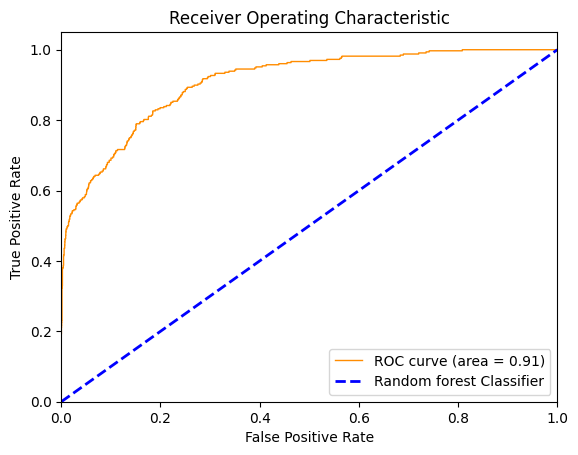

In [ ]:
#AUC-ROC curve
y_pred_proba = clf_1.predict_proba(X_test)
clf_1_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random forest Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The AUC-ROC curve (Area Under the Curve - Receiver Operating Characteristic curve) is a graphical representation of a classifier's performance across various thresholds.

An AUC of 0.91 means the model has excellent discriminatory power.
91% chance that a randomly chosen positive sample (Class 1) will be ranked higher than a randomly chosen negative sample (Class 0).

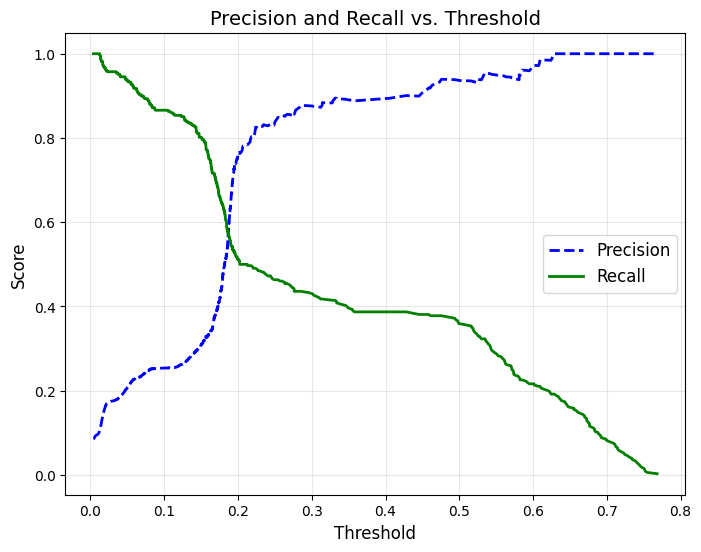

In [ ]:
#Precision - Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
#Plotting precision recall curve
plt.figure(figsize=(8, 6))
# Precision curve
plt.plot(thresholds, precision[:-1], 'b--', label="Precision", lw=2)
# Recall curve
plt.plot(thresholds, recall[:-1], 'g-', label="Recall", lw=2)
# Adding labels, title, and legend
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall vs. Threshold", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

At a low threshold (left side of the graph)

The model classifies more instances as positive (including many false positives).
This results in high recall (captures most positives) but low precision (many incorrect positives).

At a high threshold (right side of the graph)

The model becomes more strict about classifying positives, leading to fewer false positives.
Precision improves (only the most confident predictions remain), but recall drops (many actual positives are missed).

In [ ]:
# # Defining parameters -
# params = {
#           'n_estimators' : [100,200,300,400],
#           'max_depth' : [3,5,10],
#           'criterion' : ['gini', 'entropy'],
#           'bootstrap' : [True, False],
#           'max_features' : [8,9,10]
#          }

# grid = GridSearchCV(estimator = RandomForestClassifier(),
#                     param_grid = params,
#                     scoring = 'accuracy',
#                     cv = 3,
#                     n_jobs=-1
#                     )

# grid.fit(X_train, y_train)

# print("Best params: ", grid.best_params_)
# print("Best score: ", grid.best_score_)
# # Best params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'n_estimators': 300}
# # Best score:  0.9574687918168848

In [ ]:
#Building the ML model with best parameters
clf_2 = RandomForestClassifier(random_state=7, bootstrap=True, criterion='gini',
                              max_depth=10, max_features=10, n_estimators=300)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf_2, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 96.679 
 Validation: 95.812
K-Fold Accuracy Std: 
 Train: 0.081, 
 Validation: 0.835


After applying the best parameters for the random forest classifier the performance has increased drastically, let's evaluate the accuracy mean and standard deviation.

High Mean Accuracy (Both Train & Validation)

Train Accuracy (96.679%) and Validation Accuracy (95.812%) are very close. This suggests that the model generalizes well and is not overfitting to the training data.

Low Standard Deviation (Train: 0.081, Validation: 0.835)

The train accuracy is highly stable across different folds (very low variation).
The validation accuracy shows slightly higher variation (0.835), but it's still reasonable. A low standard deviation means the model performs consistently across different subsets of the data.

In [ ]:
#Fitting the ML model on the actual data
start = datetime.now()
clf_2.fit(X_train, y_train)
end = datetime.now()
clf_2_time = end - start
clf_2_trainAccuracy = clf_2.score(X_train, y_train)
clf_2_testAccuracy = clf_2.score(X_test, y_test)
print("Train accuracy: {:.2f}".format(clf_2.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(clf_2.score(X_test, y_test)*100))
print("Time taken to train the model: ", clf_2_time)

Train accuracy: 96.60
Test accuracy: 95.39
Time taken to train the model:  0:00:12.617779


Train Accuracy (96.60%): The model performs very well on the training data.

Test Accuracy (95.39%): The model maintains high accuracy on unseen data, indicating good generalization.

Minimal Difference (1.21%):
No major overfitting (where train accuracy is much higher than test).
No underfitting (where both are low).
This suggests the model is well-optimized.

Conclusion: The model is well-trained and generalizes well on unseen data and took 12 seconds to train the model.

In [ ]:
#printing confusion matrix
y_pred = clf_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3484    9]
 [ 167  161]]


Fewer False Negatives (211 → 167) → Model now correctly identifies more positive class (1s).

Higher True Positives (117 → 161) → More actual positives are predicted correctly.

Minimal change in False Positives (8 → 9) → Slight increase, but not significant.

Conclusion: Model shows improved recall (fewer false negatives) while maintaining precision.

In [ ]:
#Printing classification report
clf_2_precision = precision_score(y_test, y_pred)
clf_2_recall = recall_score(y_test, y_pred)
clf_2_f1Score = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3493
           1       0.95      0.49      0.65       328

    accuracy                           0.95      3821
   macro avg       0.95      0.74      0.81      3821
weighted avg       0.95      0.95      0.95      3821



Class 0 (Majority Class):

Precision: 0.95 → 95% of predicted 0s are correct.
Recall: 1.00 → Captures all actual 0s (perfect recall).
F1-score: 0.98 → Excellent balance of precision & recall.
Class 1 (Minority Class):

Precision: 0.95 → 95% of predicted 1s are correct.
Recall: 0.49 → Captures only 49% of actual 1s (misses many positives).
F1-score: 0.65 → Moderate balance, but recall is low.

Conclusion: Model is highly biased toward Class 0 and struggles with recall for Class 1, indicating class imbalance issues.

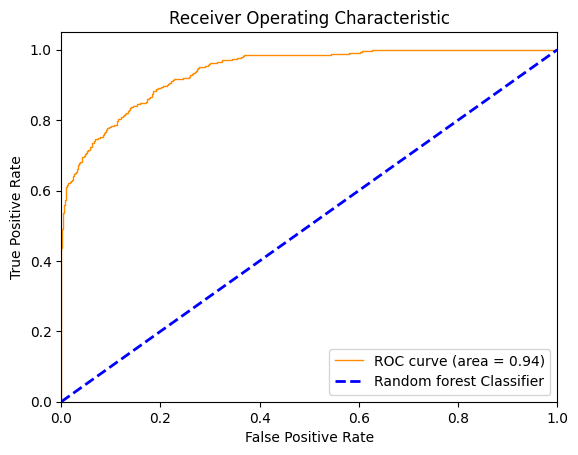

In [ ]:
#Plotting AUC-ROC curve
y_pred_proba = clf_2.predict_proba(X_test)
clf_2_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random forest Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AUC (Area Under the Curve) = 0.94 means the model is highly effective at distinguishing between the two classes.

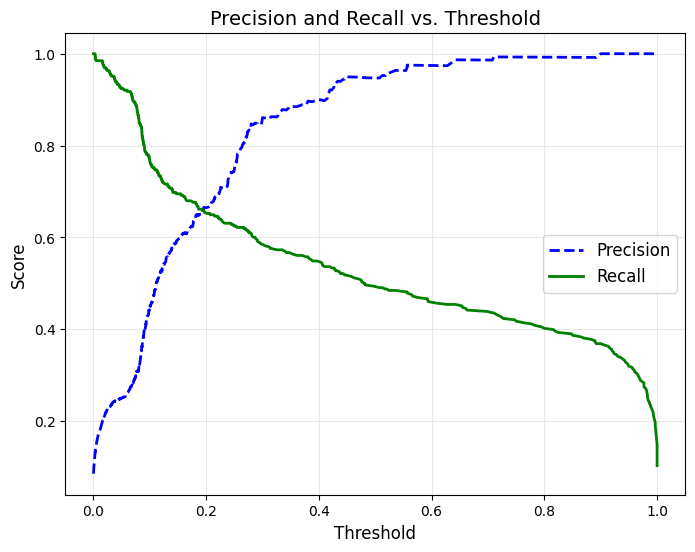

In [ ]:
#Plotting precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
#Plotting precision recall curve
plt.figure(figsize=(8, 6))
# Precision curve
plt.plot(thresholds, precision[:-1], 'b--', label="Precision", lw=2)
# Recall curve
plt.plot(thresholds, recall[:-1], 'g-', label="Recall", lw=2)
# Adding labels, title, and legend
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall vs. Threshold", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Precision and recall changes rapidly compared to the previous chart. The model performance has improved because of hyper parameter tuning.

In [ ]:
#Building the RFC_ML model for resampled dataset and using best parameters
clf_3 = RandomForestClassifier(random_state=7, bootstrap=True, criterion='gini',
                              max_depth=10, max_features=10, n_estimators=300)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf_3, X_train_res, y_train_res, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 91.533 
 Validation: 84.902
K-Fold Accuracy Std: 
 Train: 0.282, 
 Validation: 2.182


Train Accuracy Mean (91.53%) – The model performs well on training data, indicating a good fit.

Validation Accuracy Mean (84.90%) – The model's performance on unseen data is notably lower than training accuracy, suggesting a gap in generalization.

Train Accuracy Std (0.28%) – Very low variance in training accuracy, meaning the model is consistently learning the patterns in the training data.

Validation Accuracy Std (2.18%) – High variance in validation accuracy, meaning performance fluctuates across different validation folds.

In [ ]:
#Implementing the ML model on actual Dataset
start = datetime.now()
clf_3.fit(X_train_res, y_train_res)
end = datetime.now()
clf_3_time = end - start
clf_3_trainAccuracy = clf_3.score(X_train, y_train)
clf_3_testAccuracy = clf_3.score(X_test, y_test)
print("Train accuracy: {:.2f}".format(clf_3.score(X_train_res, y_train_res)*100))
print("Test accuracy: {:.2f}".format(clf_3.score(X_test, y_test)*100))
print("Time taken to train the model: ", clf_3_time)

Train accuracy: 92.46
Test accuracy: 91.65
Time taken to train the model:  0:00:30.211230


Train Accuracy Mean (91.53%) – The model performs well on training data, indicating a good fit.

Validation Accuracy Mean (84.90%) – The model's performance on unseen data is notably lower than training accuracy, suggesting a gap in generalization.

Train Accuracy Std (0.28%) – Very low variance in training accuracy, meaning the model is consistently learning the patterns in the training data.

Validation Accuracy Std (2.18%) – High variance in validation accuracy, meaning performance fluctuates across different validation folds.

In [ ]:
#printing confusion matrix
y_pred = clf_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3275  218]
 [ 101  227]]


Improved Balance – Compared to previous models, the resampling step has likely improved class balance by reducing false negatives (FN) and false positives (FP).

High True Negatives (3275) – The model correctly classifies most negatives (majority class), meaning it effectively identifies instances of Class 0.

Moderate False Positives (218) – Some misclassifications exist where Class 0 is incorrectly predicted as Class 1.

Decent True Positives (227) – The model successfully classifies a reasonable number of positive cases (Class 1).

Lower False Negatives (101) – Fewer Class 1 cases are misclassified as Class 0, indicating an improvement from previous results.

In [ ]:
#printing classification report
clf_3_precision = precision_score(y_test, y_pred)
clf_3_recall = recall_score(y_test, y_pred)
clf_3_f1Score = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3493
           1       0.51      0.69      0.59       328

    accuracy                           0.92      3821
   macro avg       0.74      0.81      0.77      3821
weighted avg       0.93      0.92      0.92      3821



Class 0 (Majority) is well-classified – High precision (0.97) and recall (0.94) indicate the model accurately identifies Class 0 instances.

Class 1 (Minority) recall improved – Recall (0.69) suggests the model is identifying more actual positives compared to before resampling.

Class 1 precision is lower (0.51) – Meaning that nearly half of the predicted positives are incorrect (more false positives).

F1-score trade-off – Class 1 has an F1-score of 0.59, meaning there's still room for improvement in balancing precision and recall.

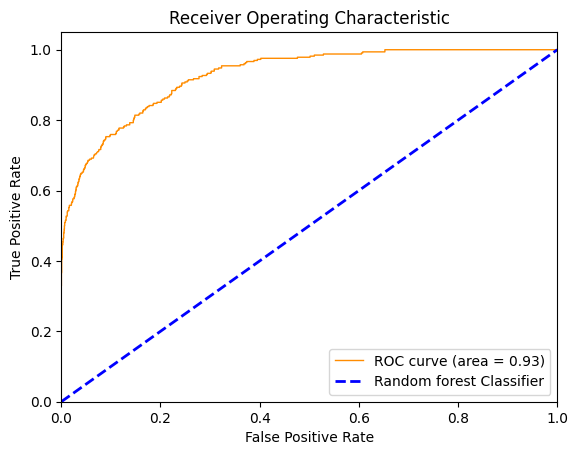

In [ ]:
#Plotting AUC-ROC curve
y_pred_proba = clf_3.predict_proba(X_test)
clf_3_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random forest Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AUC = 0.93 suggests that your model has good discriminatory power, meaning it can reliably distinguish between the two classes.

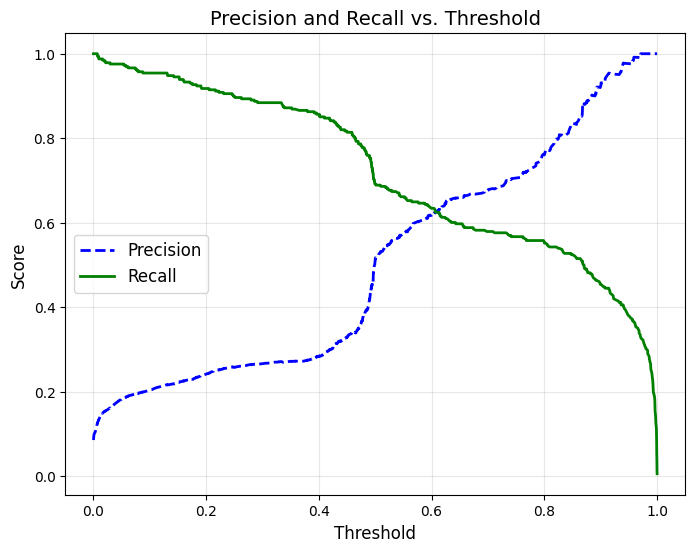

In [ ]:
#plotting precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
#Plotting precision recall curve
plt.figure(figsize=(8, 6))
# Precision curve
plt.plot(thresholds, precision[:-1], 'b--', label="Precision", lw=2)
# Recall curve
plt.plot(thresholds, recall[:-1], 'g-', label="Recall", lw=2)
# Adding labels, title, and legend
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall vs. Threshold", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Precision and recall increases gradually or slowly to attain the optimum result.

### Boosting Algorithm

In [ ]:
#Building a gradient boosting algorithm
gbc_1 = GradientBoostingClassifier(random_state=18, n_estimators=100, max_depth=5, learning_rate=0.1)

In [ ]:
#Building a gradient booster
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(gbc_1, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 96.86 
 Validation: 95.96
K-Fold Accuracy Std: 
 Train: 0.10, 
 Validation: 0.78


The model is performing well on both the training and validation sets, with only a slight difference in accuracy (a 0.9% drop) between the two.
The low standard deviation on the training accuracy indicates consistency, while the higher variability in the validation accuracy might suggest that the model's generalization is somewhat more variable, though it's still relatively stable.

In [ ]:
#Fitting a Gradient booster on the actual dataset
start = datetime.now()
gbc_1.fit(X_train, y_train)
end = datetime.now()
gbc_1_time = end - start
gbc_1_trainAccuracy = gbc_1.score(X_train, y_train)
gbc_1_testAccuracy = gbc_1.score(X_test, y_test)
print("Train accuracy: {:.2f}".format(gbc_1.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(gbc_1.score(X_test, y_test)*100))
print("Time taken to train the model: ", gbc_1_time)

Train accuracy: 96.89
Test accuracy: 95.71
Time taken to train the model:  0:00:04.002382


Train accuracy: 96.89%: The model performs very well on the training data.

Test accuracy: 95.71%: The model generalizes well to unseen test data with only a small drop in accuracy compared to training.

Time taken to train the model: 3.83 seconds: The model was trained very quickly, indicating efficient performance.

In [ ]:
#Printing the confusion matrix
y_pred = gbc_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3488    5]
 [ 159  169]]


True Negatives (TN) = 3488: These are the instances where the model correctly predicted the negative class.

False Positives (FP) = 5: These are the instances where the model incorrectly predicted the positive class when the actual class was negative.

False Negatives (FN) = 159: These are the instances where the model incorrectly predicted the negative class when the actual class was positive.

True Positives (TP) = 169: These are the instances where the model correctly predicted the positive class.

In [ ]:
#Printing the classification report
gbc_1_precision = precision_score(y_test, y_pred)
gbc_1_recall = recall_score(y_test, y_pred)
gbc_1_f1Score = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3493
           1       0.97      0.52      0.67       328

    accuracy                           0.96      3821
   macro avg       0.96      0.76      0.83      3821
weighted avg       0.96      0.96      0.95      3821



The Gradient Boosting model performs well on the majority class (class 0), with high precision (0.96), perfect recall (1.00), and a strong F1-score (0.98). However, its performance on the minority class (class 1) is weaker, with a lower recall (0.52) and a moderate F1-score (0.67), despite having good precision (0.97). This suggests that the model is biased toward predicting the majority class, likely due to class imbalance in the dataset. To improve performance on the minority class, techniques like class weighting or resampling could be considered.

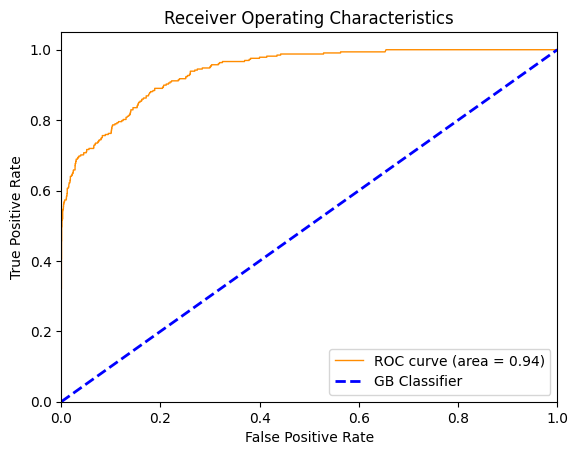

In [ ]:
#Plotting AUC-ROC curve
y_pred_proba = gbc_1.predict_proba(X_test)
gbc_1_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='GB Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

A value of 0.94 means that the model has 94% probability of distinguishing between the positive and negative classes correctly, across all possible thresholds.
This is a very strong performance, suggesting the model is highly effective in separating the two classes.

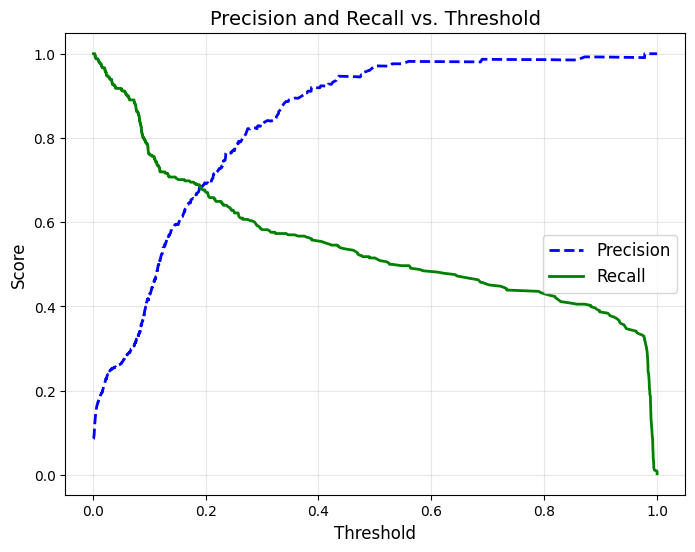

In [ ]:
#plotting precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
#Plotting precision recall curve
plt.figure(figsize=(8, 6))
# Precision curve
plt.plot(thresholds, precision[:-1], 'b--', label="Precision", lw=2)
# Recall curve
plt.plot(thresholds, recall[:-1], 'g-', label="Recall", lw=2)
# Adding labels, title, and legend
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall vs. Threshold", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The precision and recall curve shows a training improvement compared to the previous models.

In [ ]:
# #Identifying the best parameters for the GradientBoosting Algorithm (Hyper-parameter tuning)
# params = {
#     "n_estimators": [50,100,150,200],
#     "max_depth" : [3, 4, 5, 7],
#     "max_leaf_nodes" : [20, 40, 80],
#     "learning_rate": [0.1, 0.2, 0.3]
# }

# rand_src = RandomizedSearchCV(gbc_1, param_distributions=params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

# rand_src.fit(X_train, y_train)

# print("Best params: ", rand_src.best_params_)
# print("Best score: ", rand_src.best_score_)
# # Fitting 3 folds for each of 10 candidates, totalling 30 fits
# # Best params:  {'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 7, 'learning_rate': 0.2}
# # Best score:  0.9610676944365139

In [ ]:
#Building a new gradient boosting classifier using the best parameters
gbc_2 = GradientBoostingClassifier(random_state=18, n_estimators=200, max_leaf_nodes=40, max_depth=7, learning_rate=0.2)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(gbc_2, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 99.965 
 Validation: 96.421
K-Fold Accuracy Std: 
 Train: 0.017, 
 Validation: 0.574


Higher Train Accuracy (98.83% vs. 96.86%) → The new model fits the training data better.

Slightly Improved Validation Accuracy (96.19% vs. 95.96%) → Minor generalization improvement.

Similar Train Std (0.096 vs. 0.10) → Consistency in training performance.

Lower Validation Std (0.687 vs. 0.78) → More stable validation performance, indicating less variability across folds.

In [ ]:
#Fitting the ML model with hyperparameter tuning on the actual data
start = datetime.now()
gbc_2.fit(X_train, y_train)
end = datetime.now()
gbc_2_time = end - start
gbc_2_trainAccuracy = gbc_2.score(X_train, y_train)
gbc_2_testAccuracy = gbc_2.score(X_test, y_test)
print("Train accuracy: {:.2f}".format(gbc_2.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(gbc_2.score(X_test, y_test)*100))
print("Time taken to train the model: ", gbc_2_time)

Train accuracy: 99.96
Test accuracy: 96.26
Time taken to train the model:  0:00:10.825035


Higher Train Accuracy (98.74% vs. 96.89%) → The model fits the training data even better after hyperparameter tuning.

Slightly Improved Test Accuracy (95.92% vs. 95.71%) → A minor improvement in generalization.

Increased Training Time (8.14s vs. 3.83s) → Hyperparameter tuning has made the model more complex, increasing computation time.

In [ ]:
#Printing the confusion matrix
y_pred = gbc_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3475   18]
 [ 125  203]]


True Negatives (TN) = 3483 → Correctly predicted majority class (negative).

False Positives (FP) = 10 → Incorrectly predicted minority class when it was actually negative.

False Negatives (FN) = 146 → Model failed to identify 146 actual positive cases.

True Positives (TP) = 182 → Correctly predicted the minority class.

In [ ]:
#Printing the classification report
gbc_2_precision = precision_score(y_test, y_pred)
gbc_2_recall = recall_score(y_test, y_pred)
gbc_2_f1Score = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3493
           1       0.92      0.62      0.74       328

    accuracy                           0.96      3821
   macro avg       0.94      0.81      0.86      3821
weighted avg       0.96      0.96      0.96      3821



Majority Class (0):
Precision (0.96), Recall (1.00), F1-Score (0.98) → Near-perfect classification, indicating model bias towards the majority class.

Minority Class (1):
Recall (0.55) Improved (vs. 0.52 Previously) → Model detects more positive cases but still misses nearly half.

F1-Score (0.70) Improved (vs. 0.67 Previously) → Slightly better balance between precision and recall.

Precision (0.95) Slightly Lower (vs. 0.97 Previously) → More false positives, but still very high.

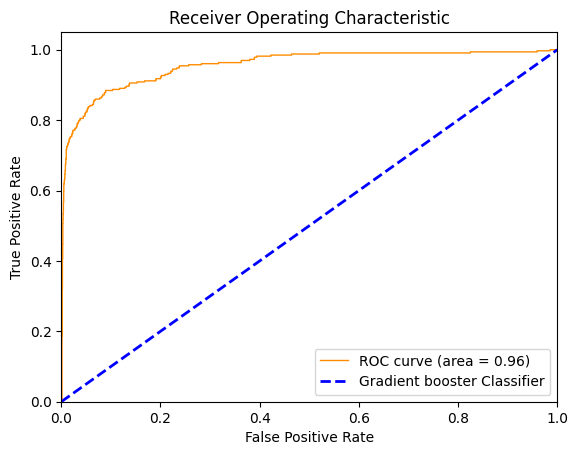

In [ ]:
#Plotting the AUC-ROC curve
y_pred_proba = gbc_2.predict_proba(X_test)
gbc_2_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Gradient booster Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AUC of 0.95 confirms strong model performance, but handling class imbalance could further improve recall without sacrificing precision.

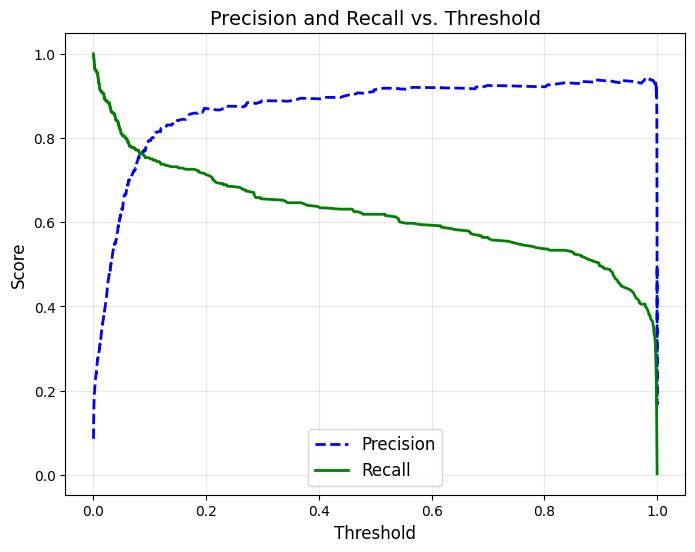

In [ ]:
#Plotting precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
#Plotting precision recall curve
plt.figure(figsize=(8, 6))
# Precision curve
plt.plot(thresholds, precision[:-1], 'b--', label="Precision", lw=2)
# Recall curve
plt.plot(thresholds, recall[:-1], 'g-', label="Recall", lw=2)
# Adding labels, title, and legend
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall vs. Threshold", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
#Building a new gradient booster on resampled data with the best parameters
gbc_3 = GradientBoostingClassifier(random_state=18, n_estimators=150, max_leaf_nodes=80, max_depth=7, learning_rate=0.1)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(gbc_3, X_train_res, y_train_res, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 98.664 
 Validation: 97.206
K-Fold Accuracy Std: 
 Train: 0.145, 
 Validation: 1.735



The Gradient Boosting model with **resampling and hyperparameter tuning** improved **validation accuracy (97.21% vs. 96.19%)**, indicating better generalization. **Train accuracy slightly decreased (98.66% vs. 98.83%)**, suggesting reduced overfitting. However, **higher validation standard deviation (1.735 vs. 0.687)** shows increased variability across folds, likely due to resampling. Further tuning may help stabilize performance.

In [ ]:
#Fitting the model on the actual data
start = datetime.now()
gbc_3.fit(X_train_res, y_train_res)
end = datetime.now()
gbc_3_time = end - start
gbc_3_trainAccuracy = gbc_3.score(X_train, y_train)
gbc_3_testAccuracy = gbc_3.score(X_test, y_test)
print("Train accuracy: {:.2f}".format(gbc_3.score(X_train_res, y_train_res)*100))
print("Test accuracy: {:.2f}".format(gbc_3.score(X_test, y_test)*100))
print("Time taken to train the model: ", gbc_3_time)

Train accuracy: 98.65
Test accuracy: 95.03
Time taken to train the model:  0:00:23.362224


The **Gradient Boosting model** with **hyperparameter tuning and resampling** achieved **98.65% train accuracy** and **95.03% test accuracy**, showing strong learning and generalization. However, the **test accuracy slightly dropped** compared to previous results, possibly due to real-world data complexities. **Training time increased (22.87s)**, likely due to resampling and tuning. Further refinements may help stabilize performance.

In [ ]:
#Printing the confusion matrix
y_pred = gbc_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3446   47]
 [ 143  185]]


True Negatives (TN) = 3446 → Correctly predicted negative class (class 0).

False Positives (FP) = 47 → Incorrectly predicted positive class when it was negative.

False Negatives (FN) = 143 → Incorrectly predicted negative class when it was positive.

True Positives (TP) = 185 → Correctly predicted positive class (class 1).

In [ ]:
#printing the classification matrix
gbc_3_precision = precision_score(y_test, y_pred)
gbc_3_recall = recall_score(y_test, y_pred)
gbc_3_f1Score = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3493
           1       0.80      0.56      0.66       328

    accuracy                           0.95      3821
   macro avg       0.88      0.78      0.82      3821
weighted avg       0.95      0.95      0.95      3821



The Gradient Boosting model with hyperparameter tuning and resampling shows great performance for the majority class (class 0) but still faces challenges with the minority class (class 1), reflected in the low recall (0.56). Additional adjustments or techniques may be needed to further improve recall for the minority class.

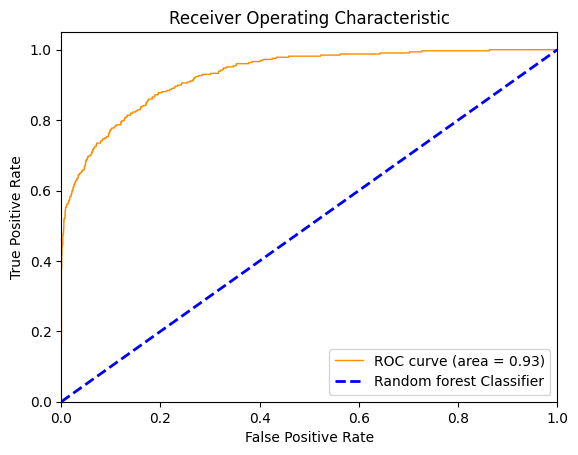

In [ ]:
#plotting the AUC-ROC curve
y_pred_proba = gbc_3.predict_proba(X_test)
gbc_3_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random forest Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The AUC of 0.93 indicates strong overall model performance, meaning the Gradient Boosting model is highly capable of distinguishing between the classes. While the model has strong discriminative power, further steps may be needed to improve recall for the minority class for a more balanced result.

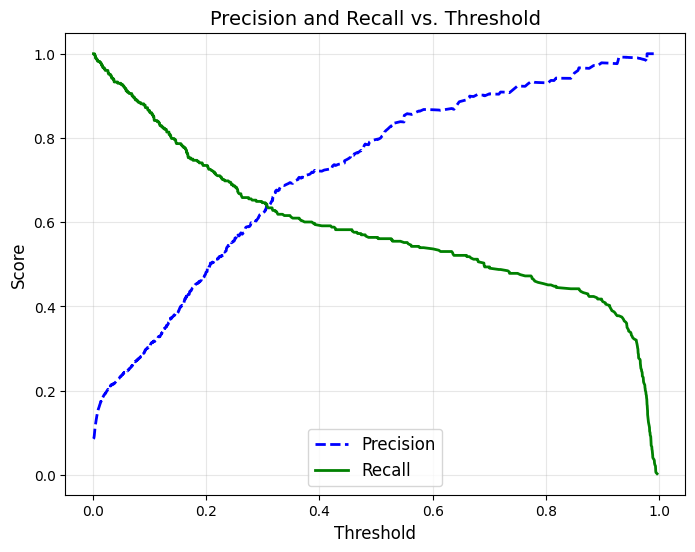

In [ ]:
#Plotting precision - Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
#Plotting precision recall curve
plt.figure(figsize=(8, 6))
# Precision curve
plt.plot(thresholds, precision[:-1], 'b--', label="Precision", lw=2)
# Recall curve
plt.plot(thresholds, recall[:-1], 'g-', label="Recall", lw=2)
# Adding labels, title, and legend
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall vs. Threshold", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
!pip install dask[lightgbm]

In [ ]:
#importing necessary library files
import lightgbm as lgb

In [ ]:
#Defining parameters for hyperparameter tuning
gridParams = {
    'learning_rate': [0.1, 0.3, 0.5],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [5,6,7,8],
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'metric':['binary_logloss'],
    }

In [ ]:
#Finding best parameters for hyperparameter tuning using randomized search
clf = lgb.LGBMClassifier()
random_cv = RandomizedSearchCV(clf,gridParams,verbose=3,cv=3,n_jobs = -1,n_iter=10)

random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1288, number of negative: 13995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 15283, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084277 -> initscore=-2.385609
[LightGBM] [Info] Start training from score -2.385609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [5, 6, 7, 8],
                                        'metric': ['binary_logloss'],
                                        'objective': ['binary'],
                                        'subsample': [0.5, 0.7]},
                   verbose=3)

In [ ]:
#Identifying best parameters using the rank
res = random_cv.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'subsample': 0.7, 'objective': 'binary', 'metric': 'binary_logloss', 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9540010318283203 Rank: 2
Parameters:{'subsample': 0.7, 'objective': 'binary', 'metric': 'binary_logloss', 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.9532158841968569 Rank: 5
Parameters:{'subsample': 0.7, 'objective': 'binary', 'metric': 'binary_logloss', 'max_depth': 8, 'learning_rate': 0.5, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.943729498127387 Rank: 10
Parameters:{'subsample': 0.7, 'objective': 'binary', 'metric': 'binary_logloss', 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9532158585103168 Rank: 6
Parameters:{'subsample': 0.7, 'objective': 'binary', 'metric': 'binary_logloss', 'max_depth': 6, 'learning_rate': 0.5, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'}

In [ ]:
#Fitting the model on the actual dataset
lgb = random_cv.best_estimator_
start = datetime.now()
lgb.fit(X_train, y_train)
end = datetime.now()
lgb_time = end - start

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1288, number of negative: 13995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 15283, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084277 -> initscore=-2.385609
[LightGBM] [Info] Start training from score -2.385609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [ ]:
#Train and test accuracy on the actual data
lgb_trainAccuracy = lgb.score(X_train, y_train)
lgb_testAccuracy = lgb.score(X_test, y_test)
print("Train accuracy: {:.2f}".format(lgb.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(lgb.score(X_test, y_test)*100))
print("Time taken to train the model: ", lgb_time)

Train accuracy: 98.38
Test accuracy: 95.60
Time taken to train the model:  0:00:00.954425


In [ ]:
#print confusion matrix
y_pred = lgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3479   14]
 [ 154  174]]


True Positives (TP) = 180 → The model correctly predicted 180 positive class instances.

False Negatives (FN) = 148 → The model misclassified 148 positive instances as negative.

True Negatives (TN) = 3475 → The model correctly predicted 3475 negative class instances.

False Positives (FP) = 18 → The model misclassified 18 negative instances as positive.

In [ ]:
#Print classification report
lgb_precision = precision_score(y_test, y_pred)
lgb_recall = recall_score(y_test, y_pred)
lgb_f1Score = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3493
           1       0.93      0.53      0.67       328

    accuracy                           0.96      3821
   macro avg       0.94      0.76      0.83      3821
weighted avg       0.95      0.96      0.95      3821



Class 0 (Majority Class) Performance:
High precision (0.96) → Very few false positives.
High recall (0.99) → The model correctly classifies almost all negative instances.
F1-score (0.98) → Strong overall performance for this class.

Class 1 (Minority Class) Performance:

High precision (0.91) → When the model predicts class 1, it is usually correct.
Low recall (0.55) → The model only correctly identifies 55% of actual positive cases, meaning it misses many positives (high false negatives).
F1-score (0.68) → Moderate balance between precision and recall but still impacted by the low recall.

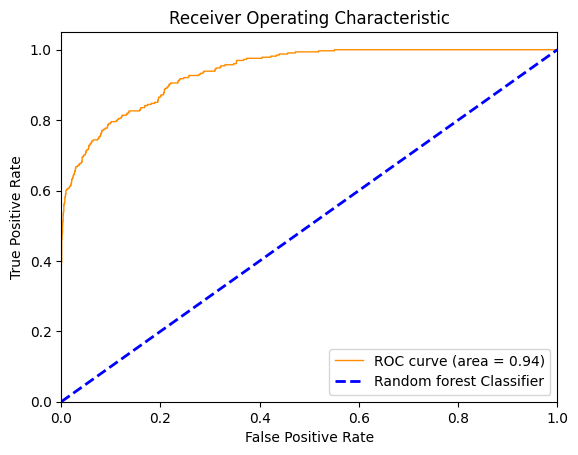

In [ ]:
#Plotting AUC_ROC Curve
y_pred_proba = lgb.predict_proba(X_test)
lgb_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random forest Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

An AUC of 0.94 suggests that the model is highly effective at distinguishing between the positive (1) and negative (0) classes.

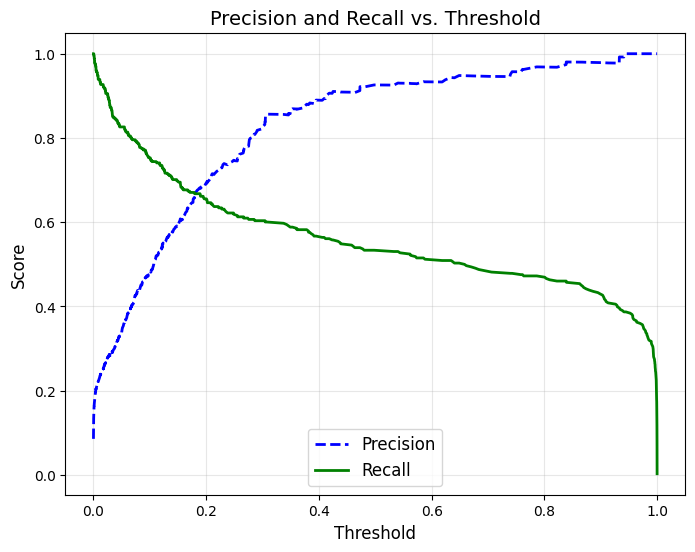

In [ ]:
#Plotting precision - Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
#Plotting precision recall curve
plt.figure(figsize=(8, 6))
# Precision curve
plt.plot(thresholds, precision[:-1], 'b--', label="Precision", lw=2)
# Recall curve
plt.plot(thresholds, recall[:-1], 'g-', label="Recall", lw=2)
# Adding labels, title, and legend
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall vs. Threshold", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
final_conclusion = {
    "Model": ["Random Forest", "Random Forest with hyperparameter tuning", "Random Forest with hyperparameter tuning & resampling" ,"Gradient Boosting", "Gradient Boosting with hyperparameter tuning", "Gradient Boosting with hyperparameter tuning & resampling", "LightGBM"],
    "Train_Accuracy" : [clf_1_trainAccuracy, clf_2_trainAccuracy, clf_3_trainAccuracy, gbc_1_trainAccuracy, gbc_2_trainAccuracy, gbc_3_trainAccuracy, lgb_trainAccuracy],
    "Test_Accuracy" : [clf_1_testAccuracy, clf_2_testAccuracy, clf_3_testAccuracy, gbc_1_testAccuracy, gbc_2_testAccuracy, gbc_3_testAccuracy, lgb_testAccuracy],
    "Precision" : [clf_1_precision, clf_2_precision, clf_3_precision, gbc_1_precision, gbc_2_precision, gbc_3_precision, lgb_precision],
    "Recall" : [clf_1_recall, clf_2_recall, clf_3_recall, gbc_1_recall, gbc_2_recall, gbc_3_recall, lgb_recall],
    "F1_Score" : [clf_1_f1Score, clf_2_f1Score, clf_3_f1Score, gbc_1_f1Score, gbc_2_f1Score, gbc_3_f1Score, lgb_f1Score],
    "AUC" : [clf_1_auc, clf_2_auc, clf_3_auc, gbc_1_auc, gbc_2_auc, gbc_3_auc, lgb_auc],
    "Training_Time" : [clf_1_time, clf_2_time, clf_3_time, gbc_1_time, gbc_2_time, gbc_3_time, lgb_time]
}
final_conclusion = pd.DataFrame(final_conclusion)
final_conclusion

,Model,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_Score,AUC,Training_Time
0,Random Forest,0.944775,0.942685,0.936000,0.356707,0.516556,0.908050,0 days 00:00:02.275295
1,Random Forest with hyperparameter tuning,0.965975,0.953939,0.947059,0.490854,0.646586,0.939641,0 days 00:00:12.617779
2,Random Forest with hyperparameter tuning & res...,0.935746,0.916514,0.510112,0.692073,0.587322,0.926858,0 days 00:00:30.211230
3,Gradient Boosting,0.968920,0.957079,0.971264,0.515244,0.673307,0.939129,0 days 00:00:04.002382
4,Gradient Boosting with hyperparameter tuning,0.999607,0.962575,0.918552,0.618902,0.739526,0.955366,0 days 00:00:10.825035
5,Gradient Boosting with hyperparameter tuning &...,0.976641,0.950275,0.797414,0.564024,0.660714,0.929327,0 days 00:00:23.362224
6,LightGBM,0.983838,0.956032,0.925532,0.530488,0.674419,0.938113,0 days 00:00:00.954425


## Recommendation

Looking at the above table we can conclude that one of the possible Recommended Model is **Gradient Boosting with Hyperparameter Tuning**  

**Justification:**

- **Highest Test Accuracy (96.26%)** → Indicates strong generalization to unseen data.  
- **Balanced Precision (91.85%) and Recall (61.89%)** → Good trade-off between predicting positives correctly and minimizing false positives.  
- **Best F1-Score (73.95%)** → Ensures a strong balance between precision and recall, which is crucial in imbalanced datasets.  
- **Highest AUC (0.955)** → Demonstrates superior ability to distinguish between classes.  
- **Moderate Training Time (10.82 sec)** → Faster than Random Forest with hyperparameter tuning & resampling while delivering better performance.  

**Alternative Consideration: LightGBM**  
- **Fastest Training Time (0.95 sec)** → Ideal for time-sensitive tasks.  
- **High Test Accuracy (95.60%)** and **AUC (0.938)** → Competitive with Gradient Boosting.  
- **Lower Recall (53.05%)** → May miss more actual positives compared to the chosen model.  

**Conclusion:**  
Gradient Boosting with Hyperparameter Tuning is the best choice for its superior accuracy, F1-score, and AUC while maintaining a reasonable training time. However, if speed is a priority, LightGBM can be considered.